# 1. Primary data analysis


## 1.1 Connecting libraries and importing data


In [1]:
%run "../../Oleksandr Zakharchuk Handbook.ipynb"

In [2]:
from sklearn.cluster import KMeans
import hdbscan
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import silhouette_score

In [3]:
#!pip install hdbscan

In [4]:
df = pd.read_csv('Data Folder/SouthGermanCredit/SouthGermanCredit.asc', delimiter=" ")

## 1.2 General information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [6]:
df

laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
995         1        24      2     3   1987         1        3     2       3   
996         1        24      2     0   2303         1        5     4       3   
997         4        21      4     0  12680         5        5     4       3   
998         2        12      2     3   6468         5        1     2       3   
999         1        30      2     2   6350         5        5     4       3   

     buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0         1  ...     2     21         3     1         1      3     2      1   
1         1  ...     1     36         3     1         2      3     1      1   
2         1  ...     1     23         3     1         1      2     2      1   
3         1  ...     1     39         3     1         2      2     1      1   
4         1  ...     2     38         1     2         2      2     2      1   
..      ...  ...   ...    ...       ...   ...       ...    ...   ...    ...   
995       1  ...     1     21         3     1         1      2     1      1   
996       2  ...     1     45         3     2         1      3     2      1   
997       1  ...     4     30         3     3         1      4     2      2   
998       1  ...     4     52         3     2         1      4     2      2   
999       1  ...     2     31         3     2         1      3     2      1   

     gastarb  kredit  
0          2       1  
1          2       1  
2          2       1  
3          1       1  
4          1       1  
..       ...     ...  
995        2       0  
996        2       0  
997        2       0  
998        2       0  
999        2       0  

[1000 rows x 21 columns]

In [7]:
df[['wohnzeit']]

wohnzeit
0           4
1           2
2           4
3           2
4           4
..        ...
995         4
996         1
997         4
998         1
999         4

[1000 rows x 1 columns]

In [8]:
target_name = 'kredit'
target = [target_name]
features = get_column_names_except_target(df, target_name)

# 2. Type conversion and value adjustment


## 2.1 Parsing Data Types and Values


In [9]:
analysis_dataframe_values_by_column(df)

Search 0 value per column: 
	Column moral:  40
	Column verw:  234
	Column kredit:  300
Search nan value per column: {}
Search None value per column: {}
Search [inf, -inf] value per column: {}
Search count per column by regular expression '\W' (without single quotes): {}
Search unique value per column by regular expression '\W' (without single quotes): {}


Null values ​​are valid for these columns. No other invalid characters were found.


# 3. Scaling

## 3.1 Preliminary analysis


Let's take a look at the distribution of all features:


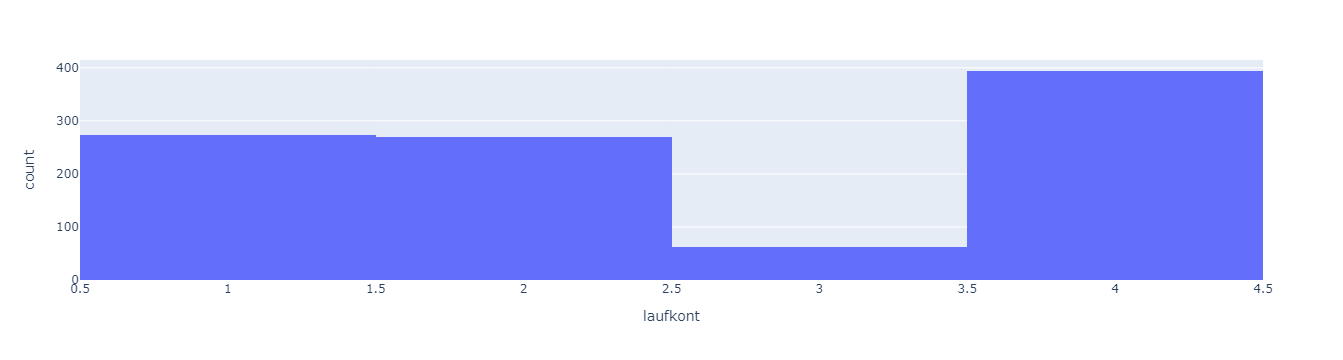

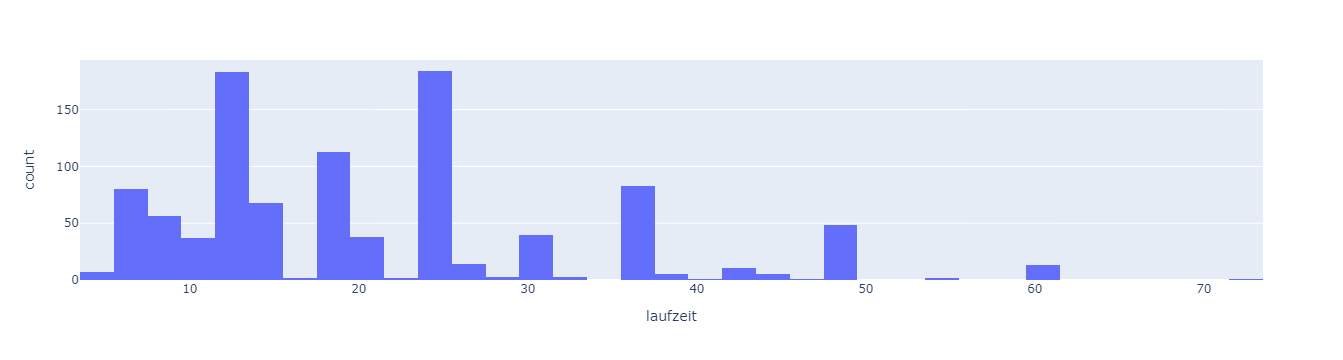

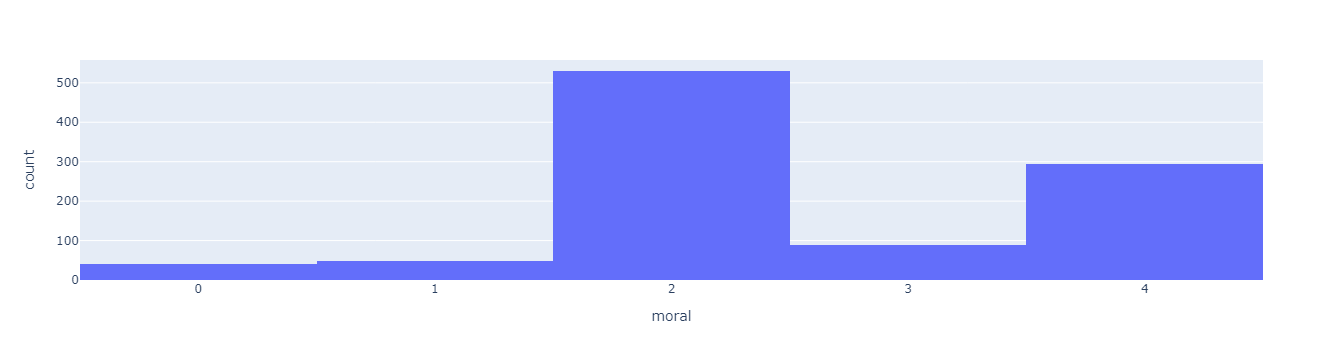

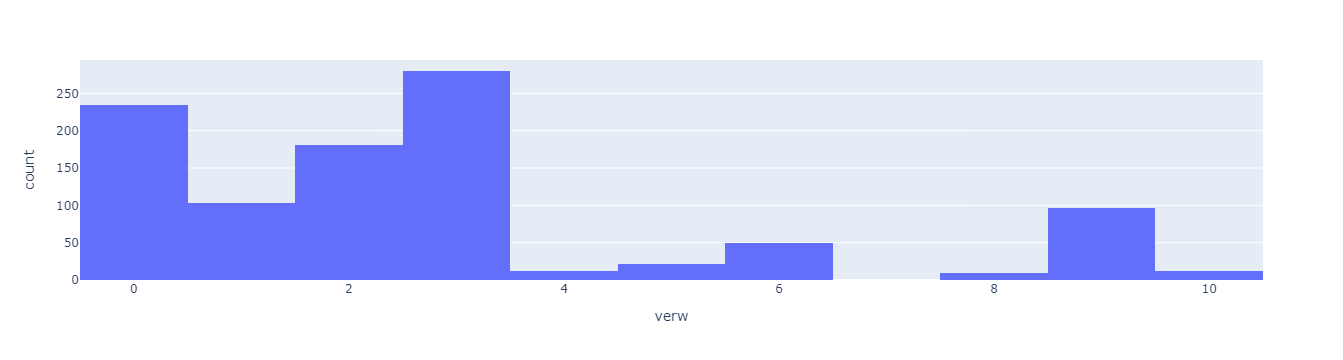

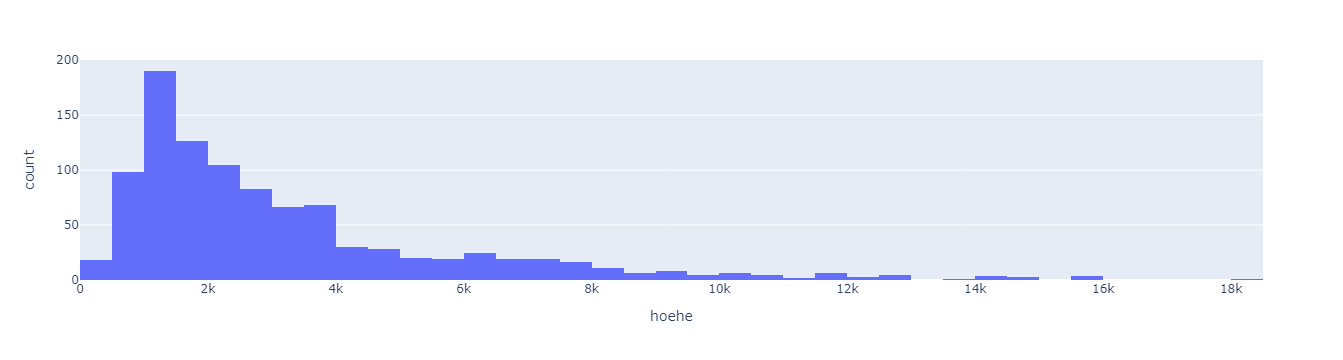

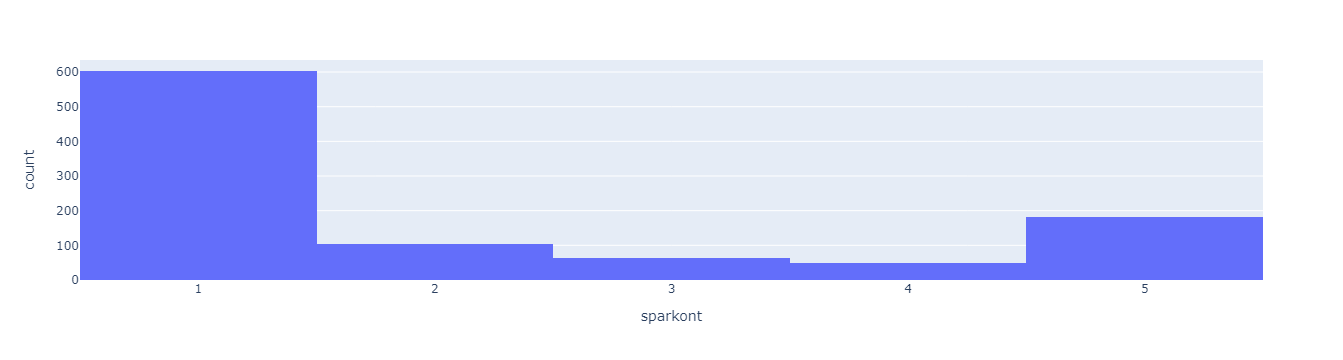

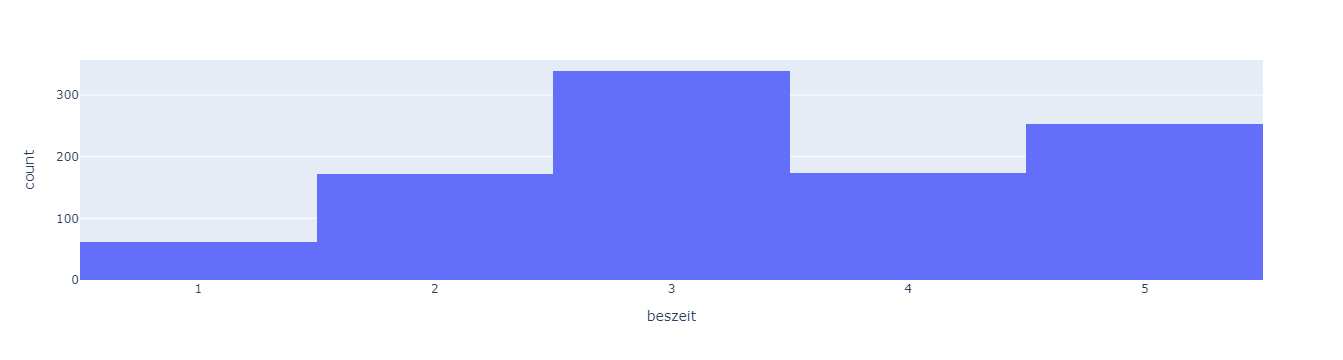

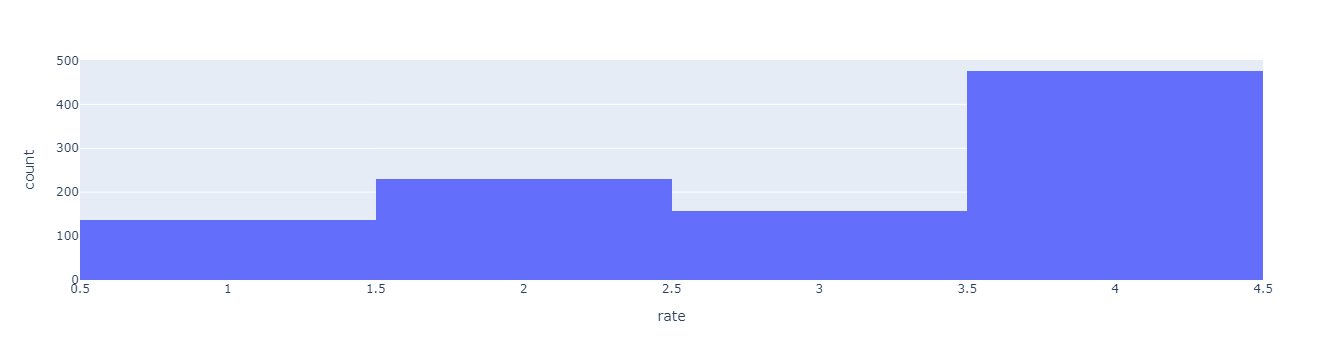

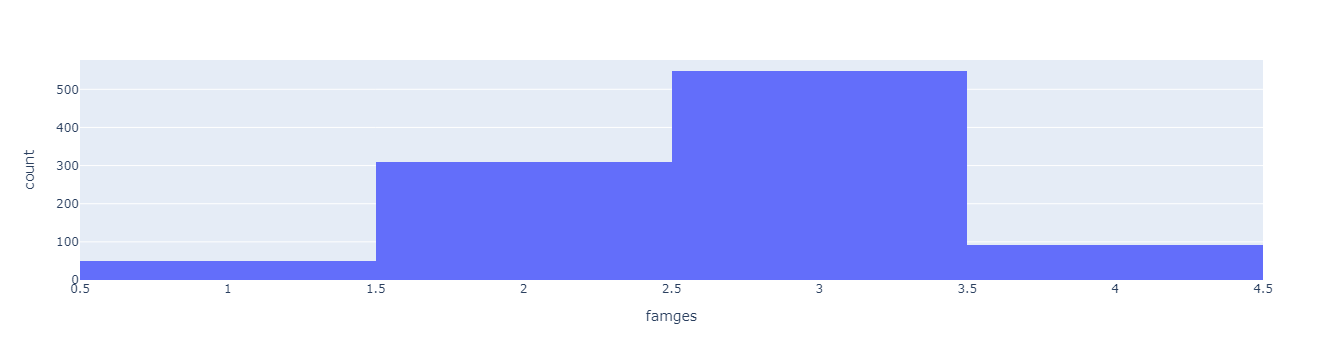

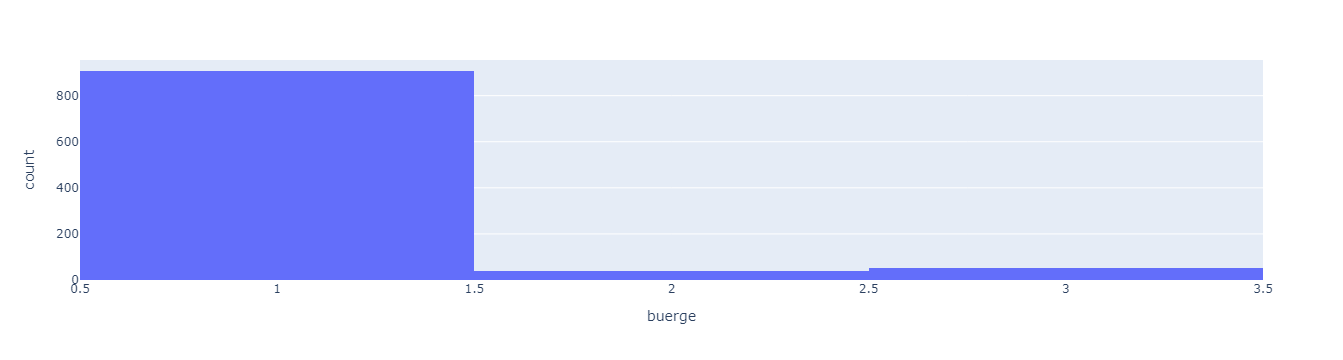

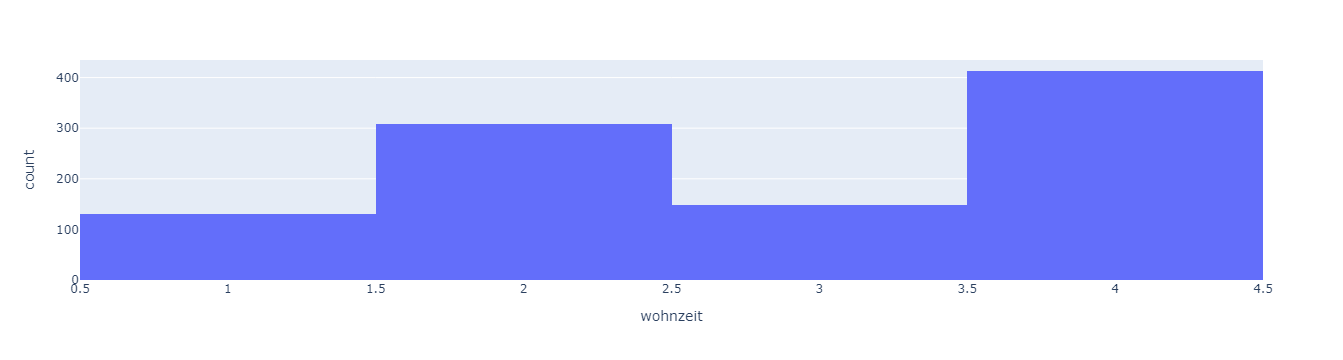

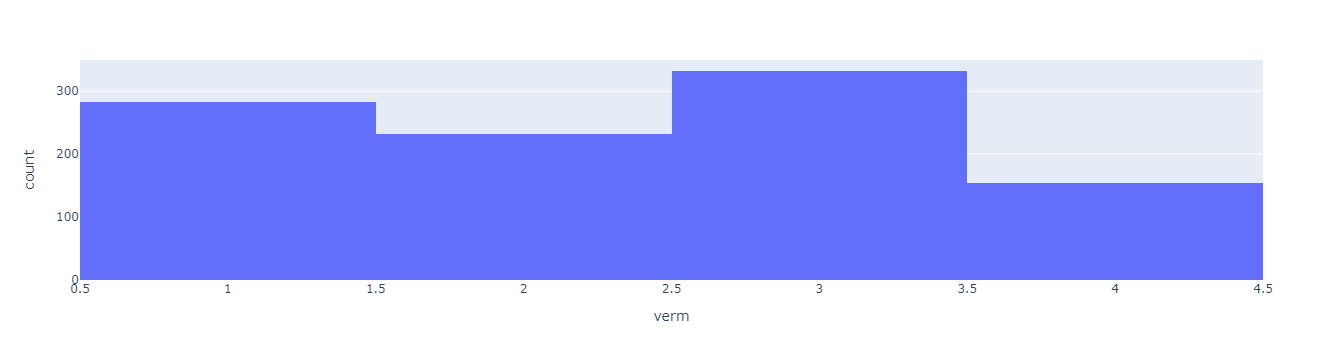

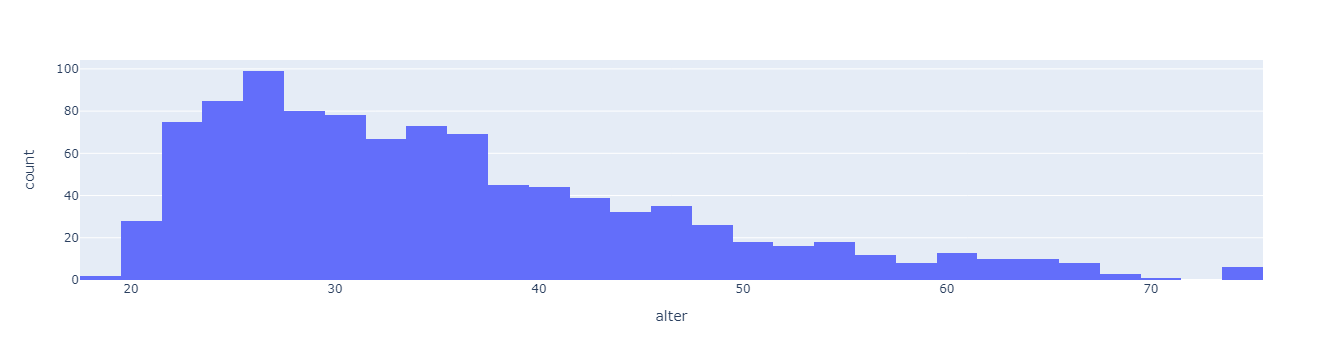

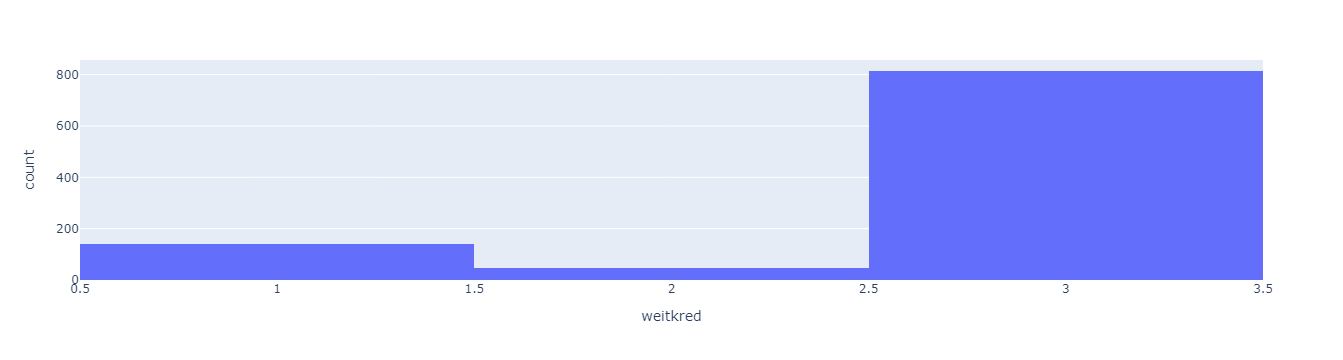

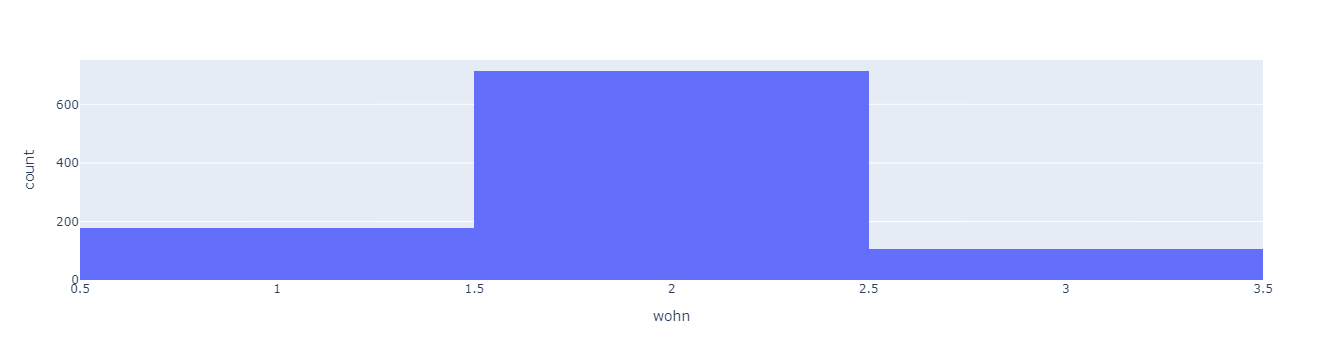

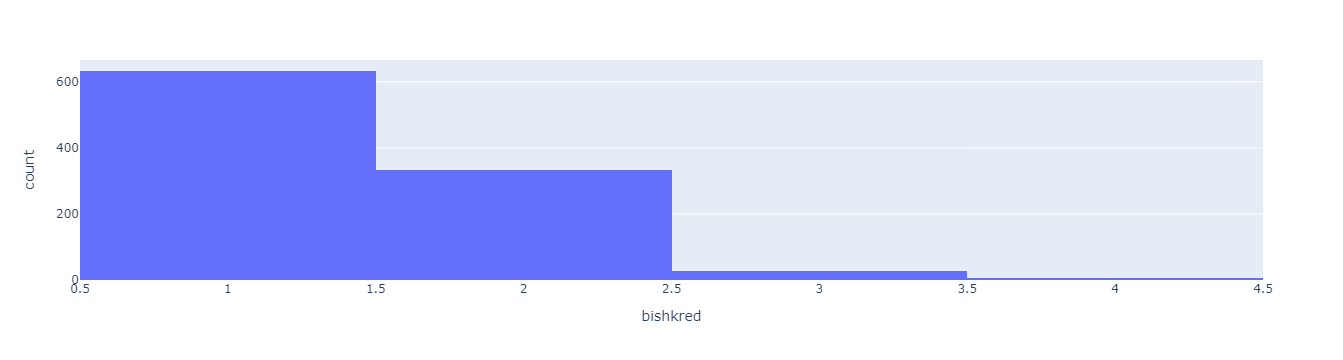

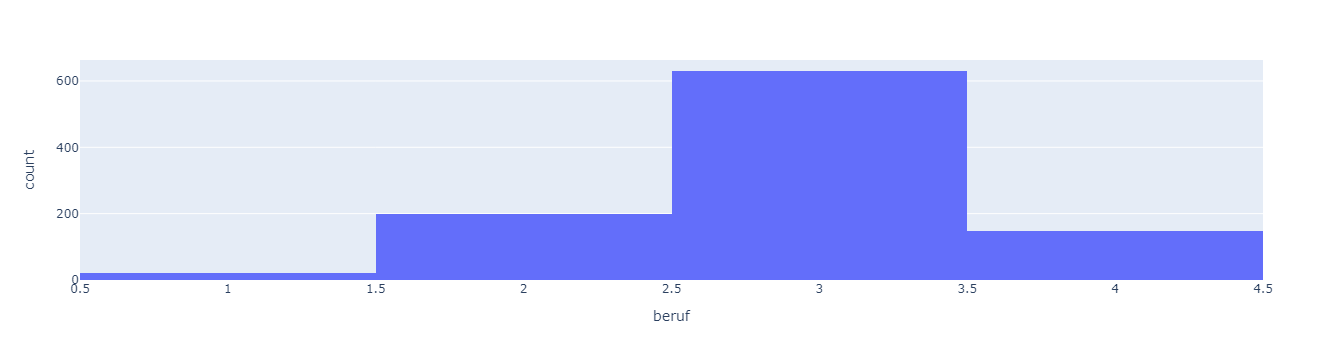

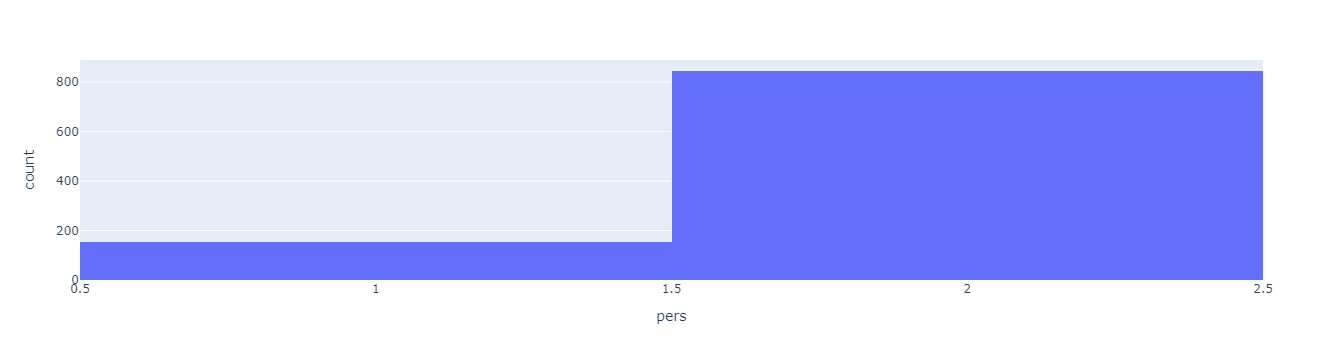

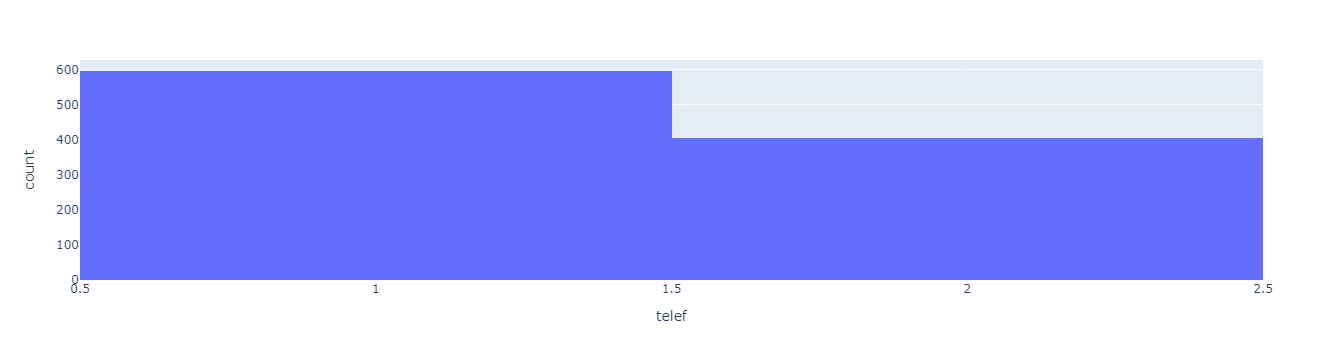

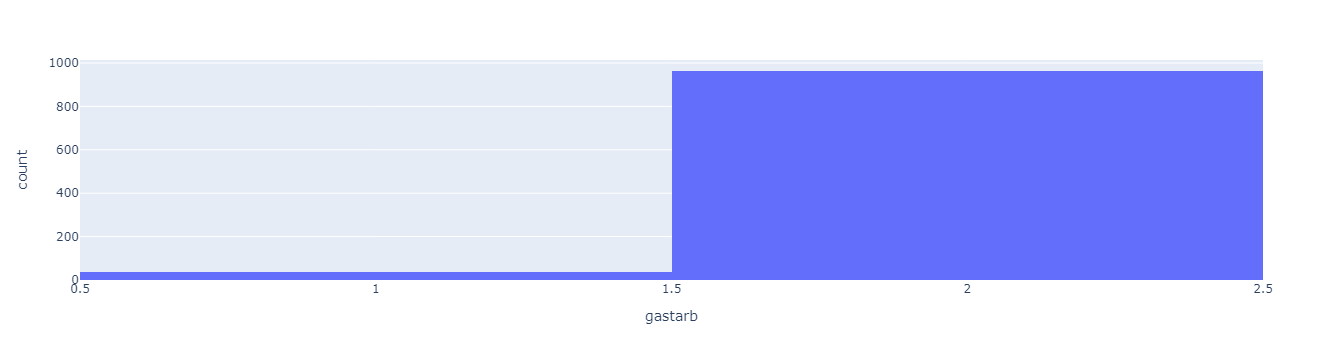

In [10]:
for f in features:
    show_histogram(df, f)

## 3.2 Scaling

### 3.2.1 Analysis after std_scale


In [11]:
std_scale_df = df.copy()
std_scale_df[features] = std_scale(std_scale_df, features)

Mean after standardization: laufkont = 0.0
Standard deviation after standardization: laufkont = 0.9999999999999999

Mean after standardization: laufzeit = 1.1368683772161603e-16
Standard deviation after standardization: laufzeit = 1.0

Mean after standardization: moral = -2.842170943040401e-17
Standard deviation after standardization: moral = 0.9999999999999999

Mean after standardization: verw = 8.08242361927114e-17
Standard deviation after standardization: verw = 1.0

Mean after standardization: hoehe = 0.0
Standard deviation after standardization: hoehe = 1.0

Mean after standardization: sparkont = -5.684341886080802e-17
Standard deviation after standardization: sparkont = 1.0

Mean after standardization: beszeit = 9.947598300641403e-17
Standard deviation after standardization: beszeit = 1.0

Mean after standardization: rate = 9.947598300641403e-17
Standard deviation after standardization: rate = 0.9999999999999998

Mean after standardization: famges = 8.881784197001253e-17
Standard

Let's take a look at the distribution of features after scaling:


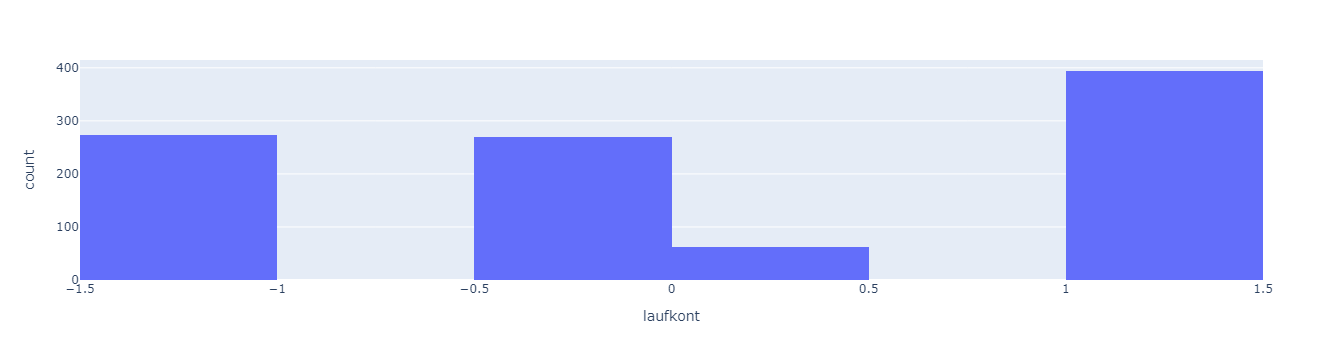

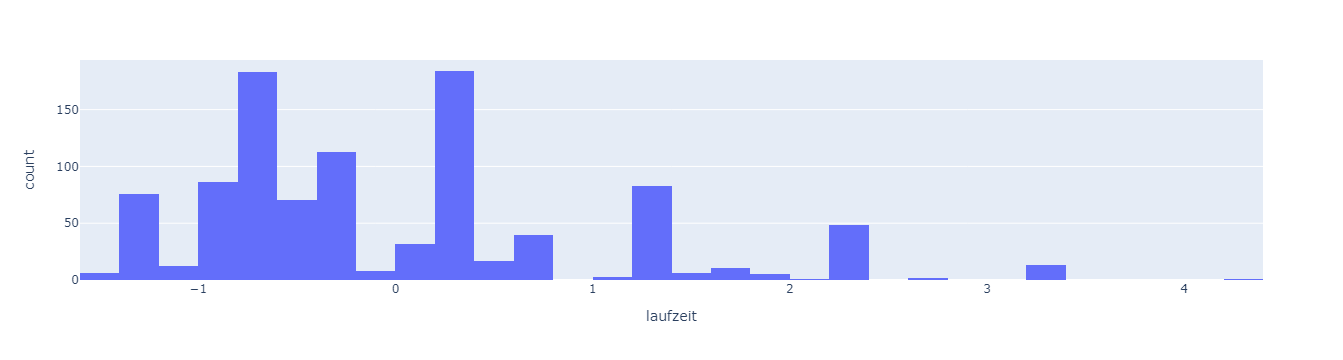

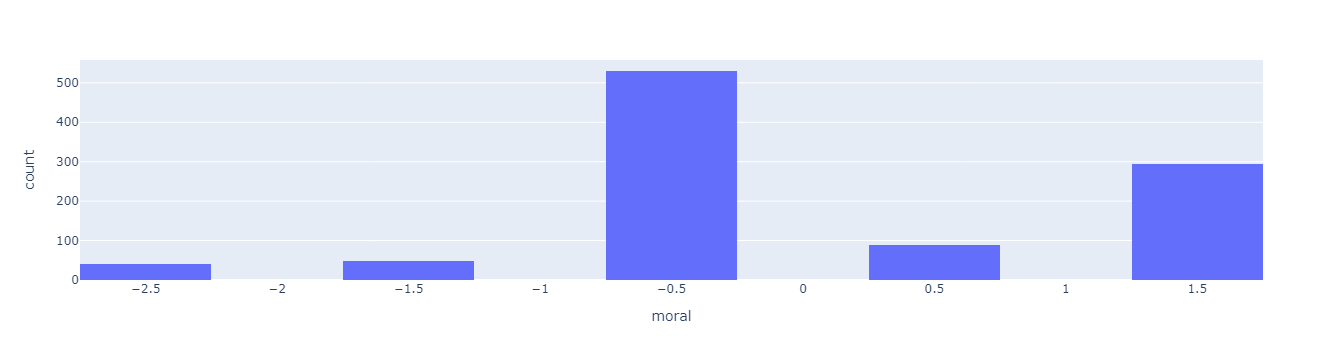

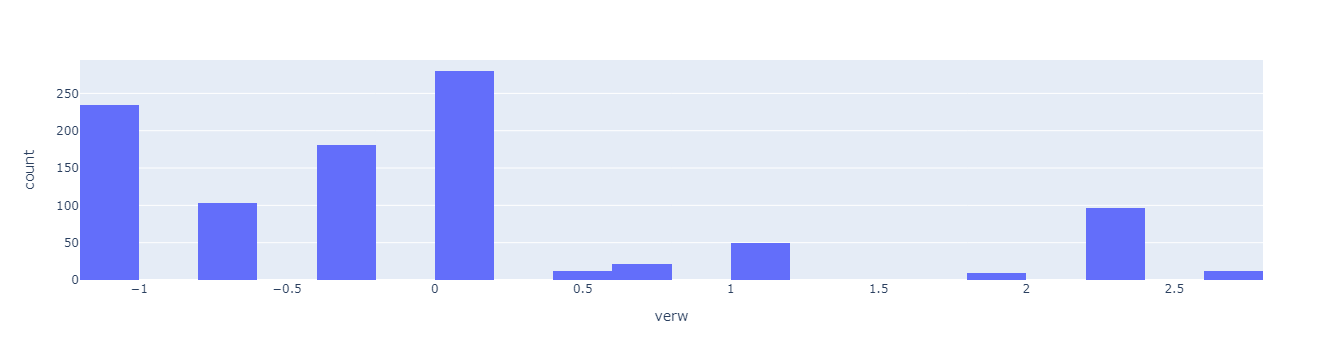

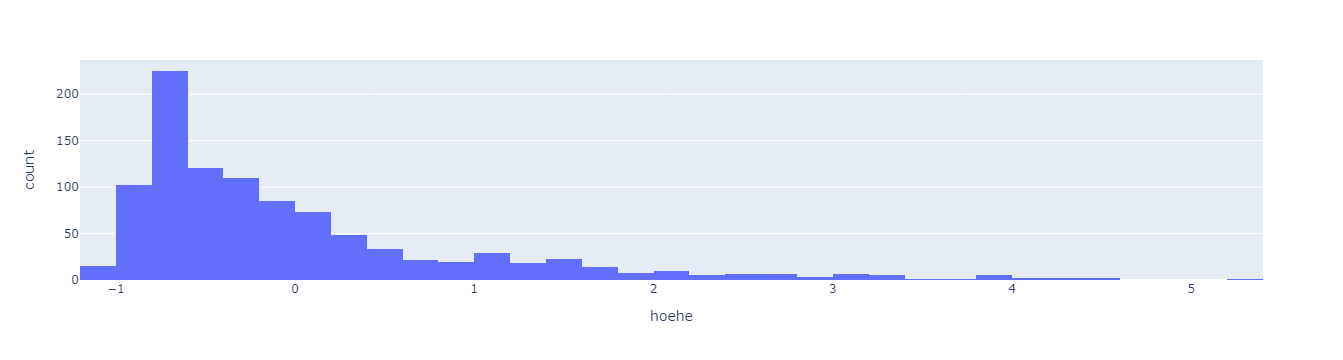

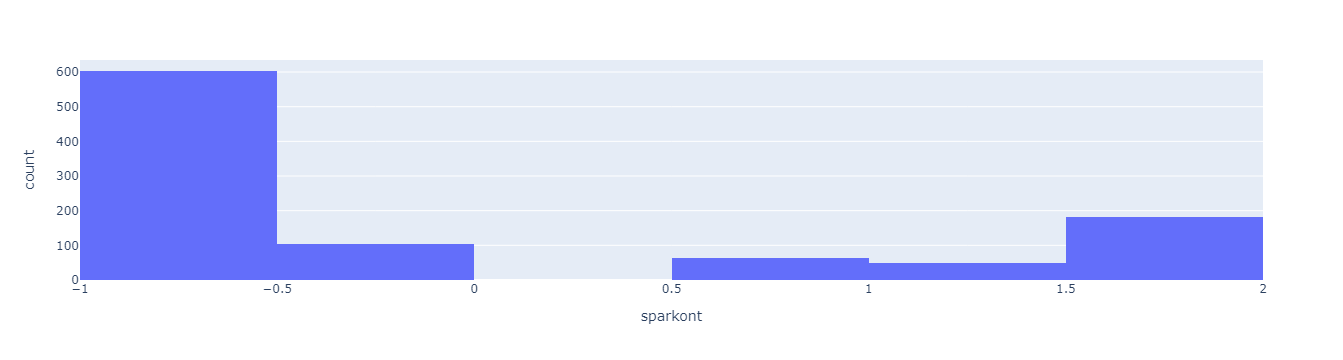

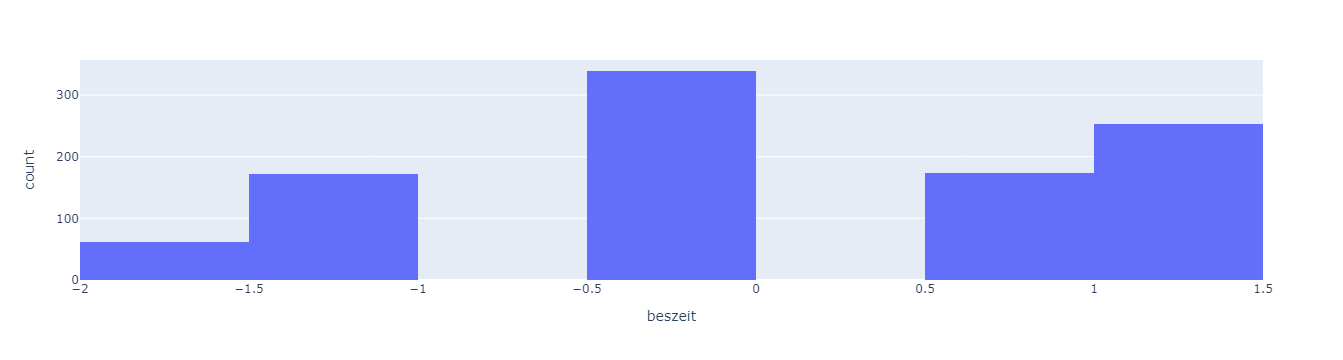

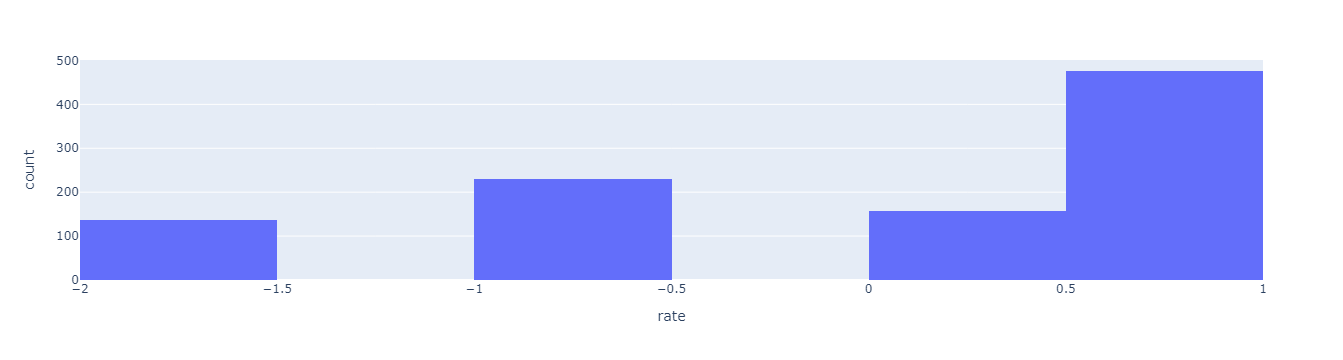

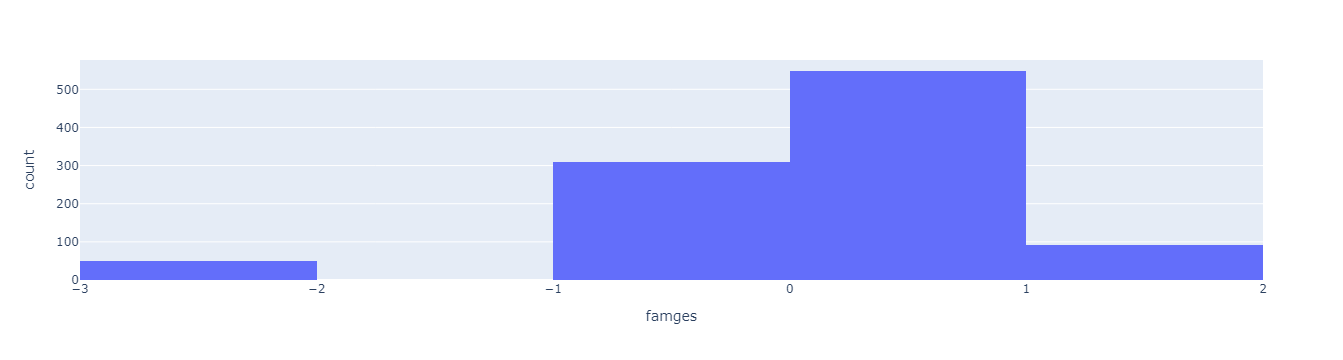

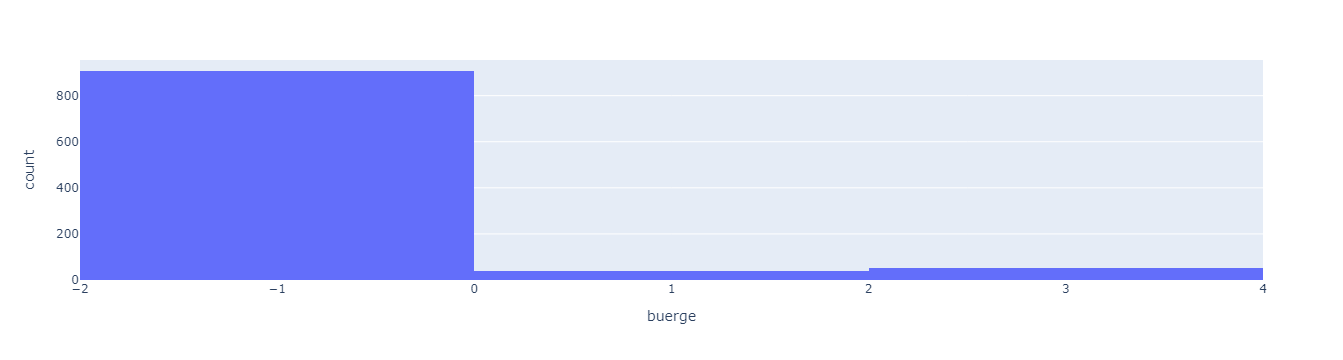

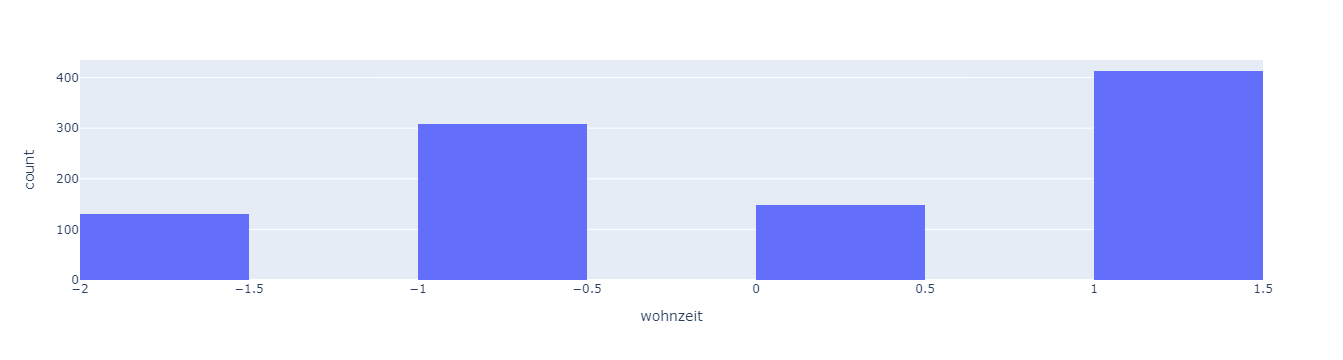

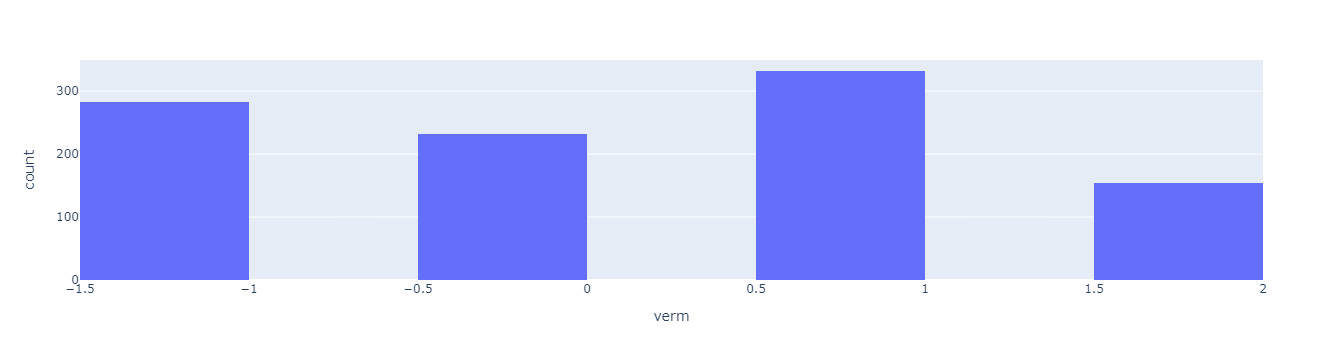

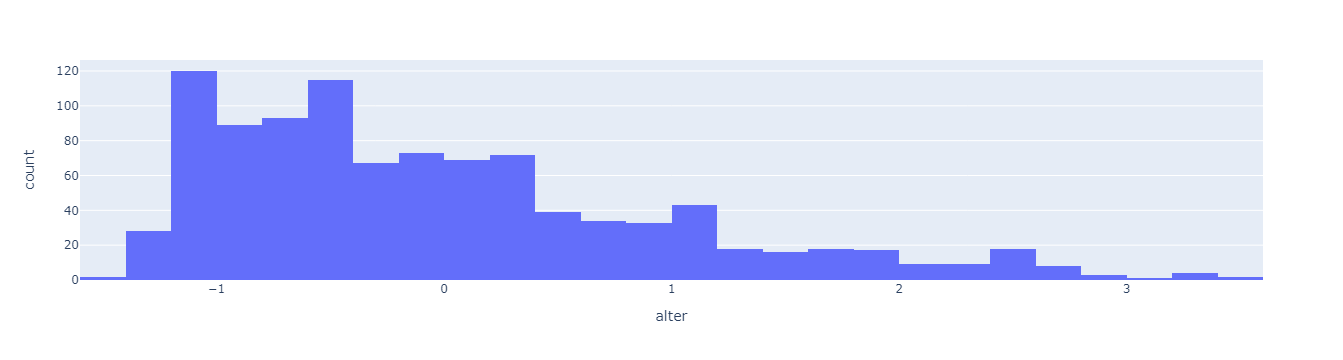

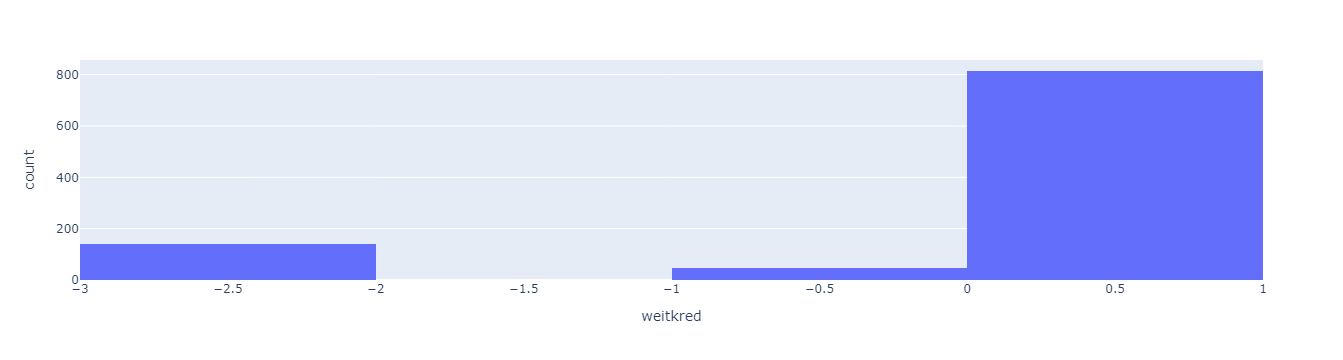

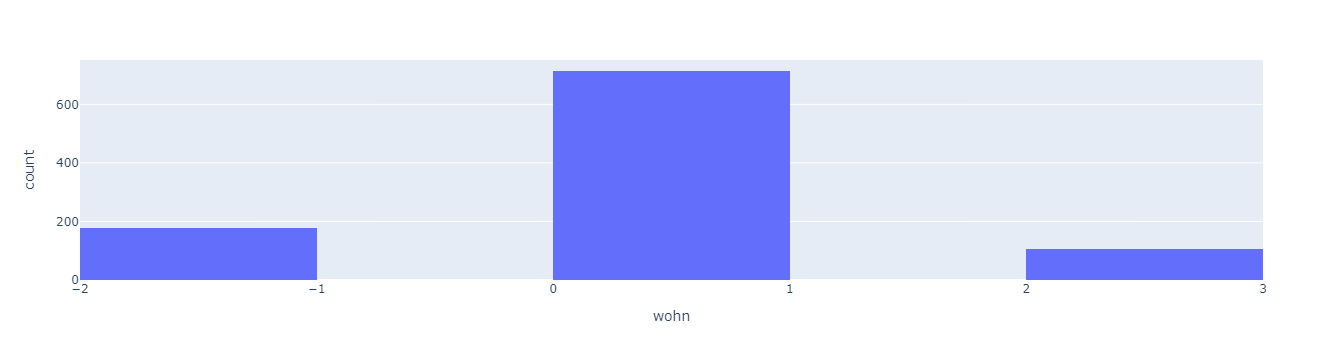

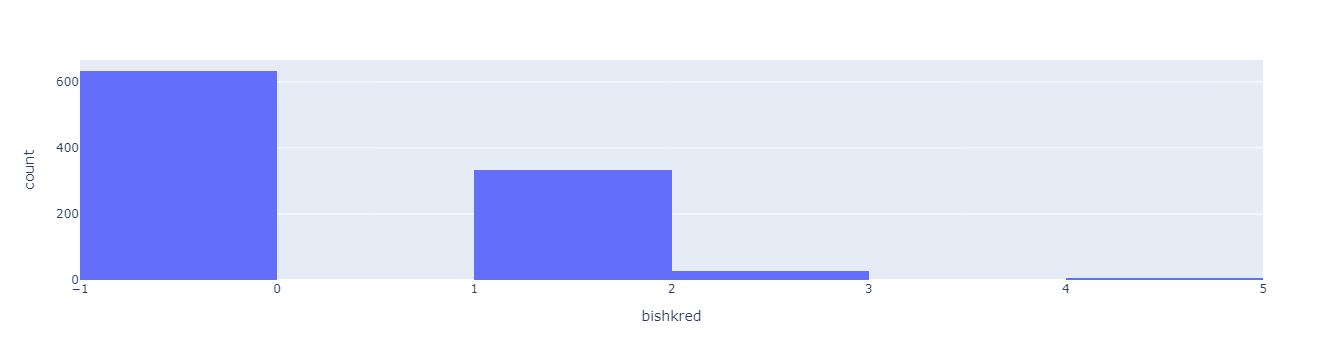

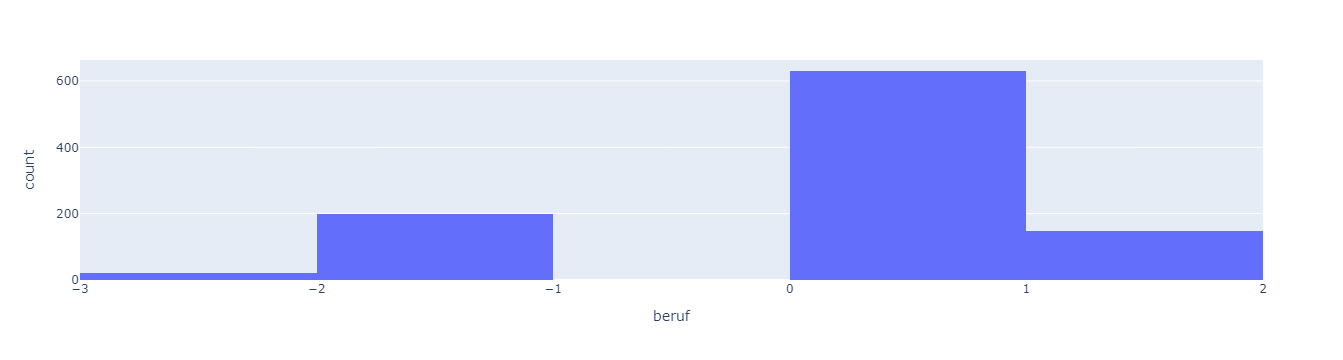

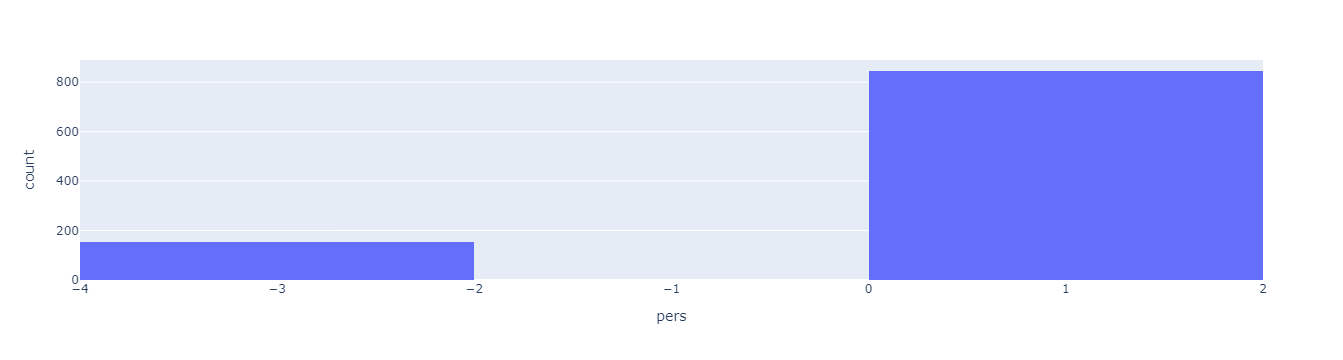

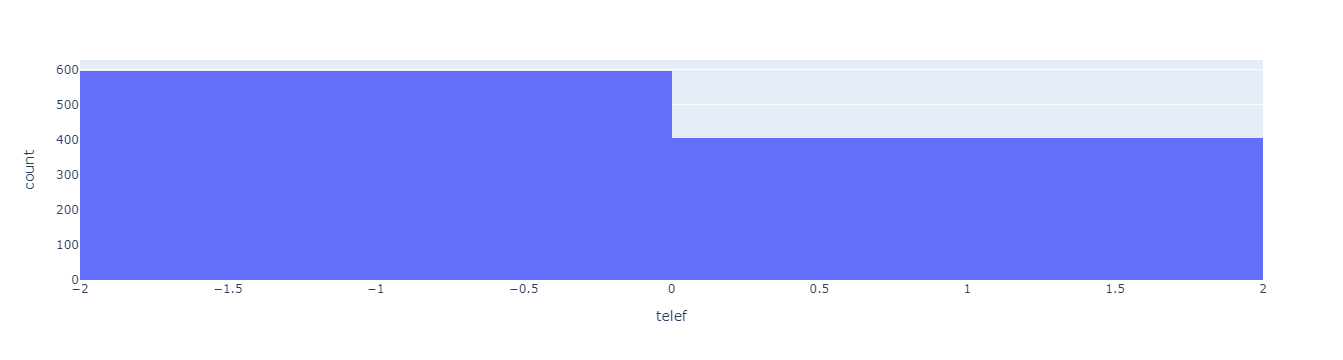

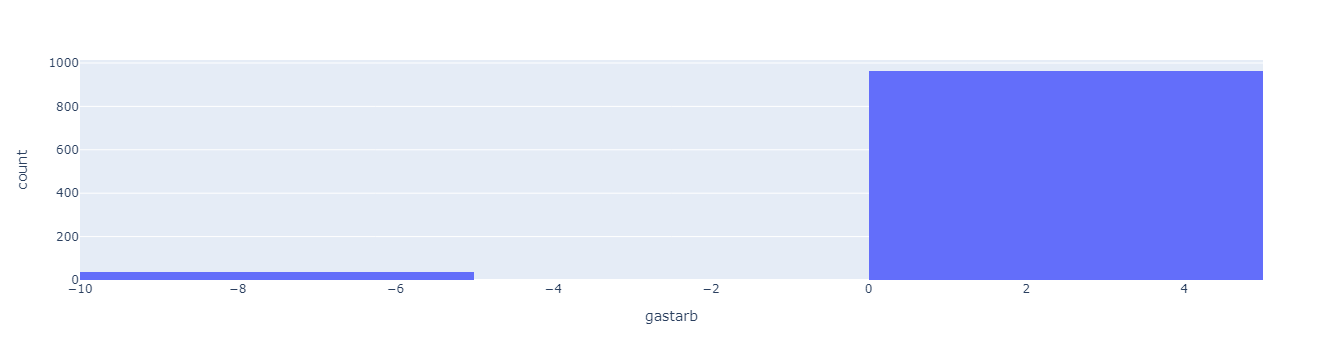

In [12]:
for f in features:
    show_histogram(std_scale_df, f)

The resulting distributions are not similar to normal distributions


### 3.2.2 Analysis after minmax_scale


In [13]:
minmax_scale_df = df.copy()
minmax_scale_df[features] = minmax_scale(minmax_scale_df, features)

Min-value after min-max scaling: laufkont=0.0
Max-value after min-max scaling: laufkont=1.0

Min-value after min-max scaling: laufzeit=0.0
Max-value after min-max scaling: laufzeit=1.0

Min-value after min-max scaling: moral=0.0
Max-value after min-max scaling: moral=1.0

Min-value after min-max scaling: verw=0.0
Max-value after min-max scaling: verw=1.0

Min-value after min-max scaling: hoehe=0.0
Max-value after min-max scaling: hoehe=1.0

Min-value after min-max scaling: sparkont=0.0
Max-value after min-max scaling: sparkont=1.0

Min-value after min-max scaling: beszeit=0.0
Max-value after min-max scaling: beszeit=1.0

Min-value after min-max scaling: rate=0.0
Max-value after min-max scaling: rate=1.0

Min-value after min-max scaling: famges=0.0
Max-value after min-max scaling: famges=1.0

Min-value after min-max scaling: buerge=0.0
Max-value after min-max scaling: buerge=1.0

Min-value after min-max scaling: wohnzeit=0.0
Max-value after min-max scaling: wohnzeit=1.0

Min-value after

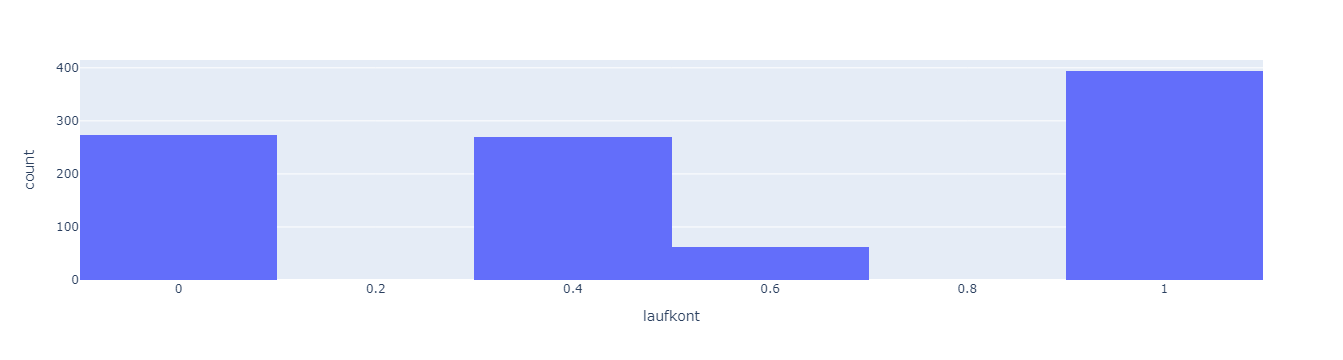

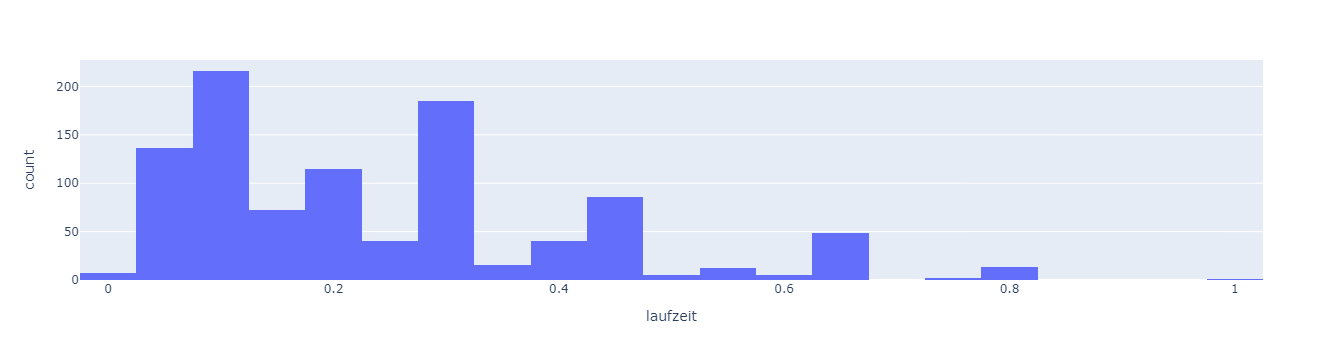

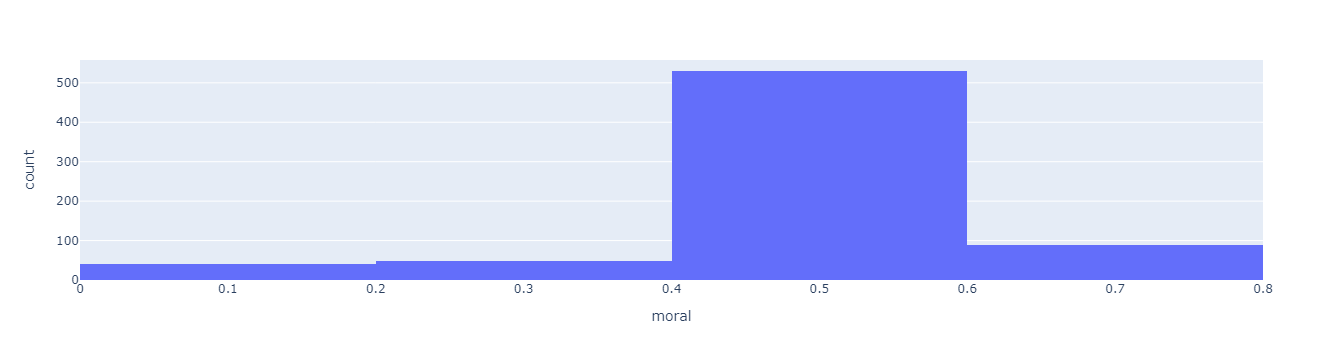

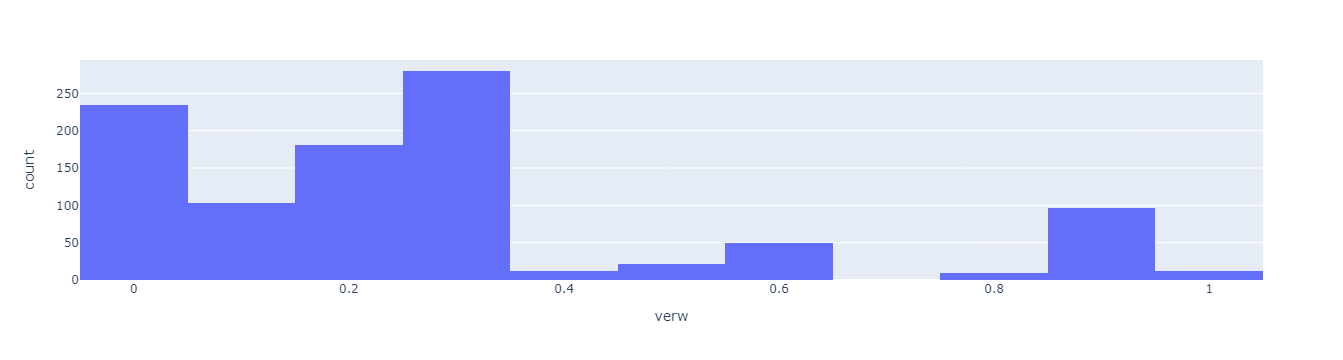

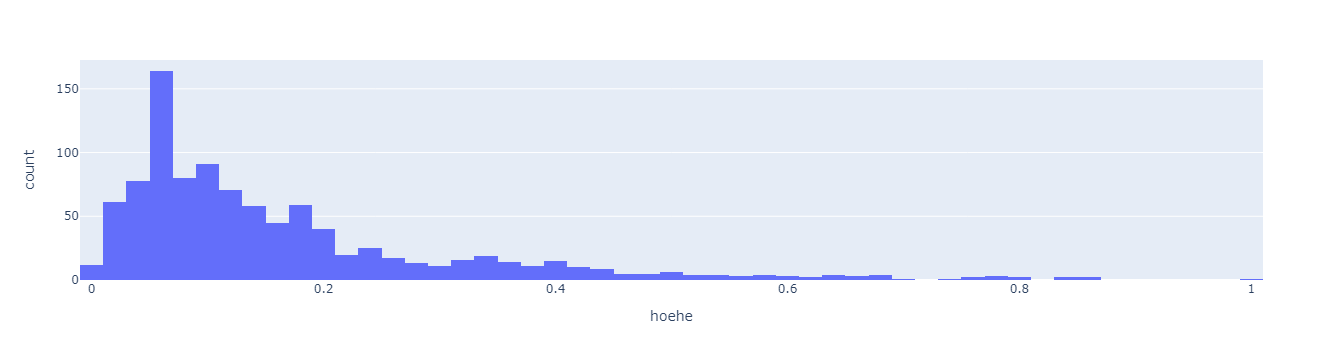

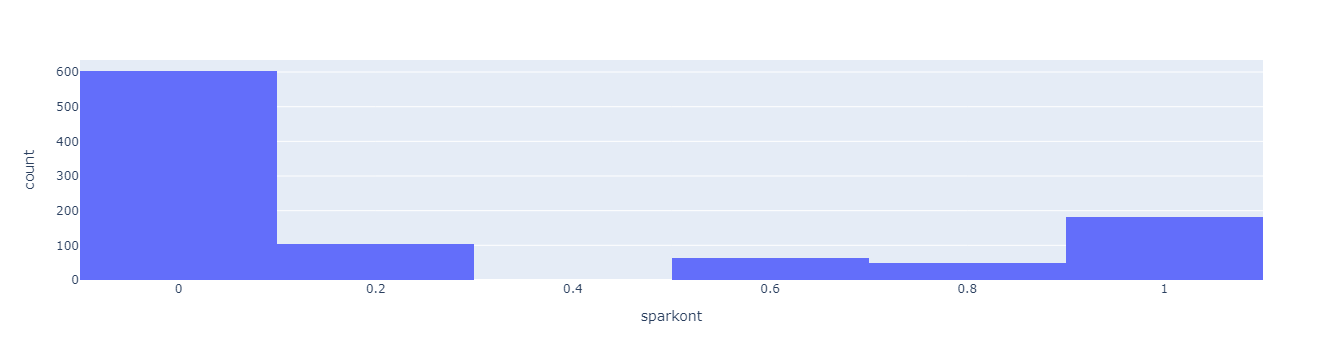

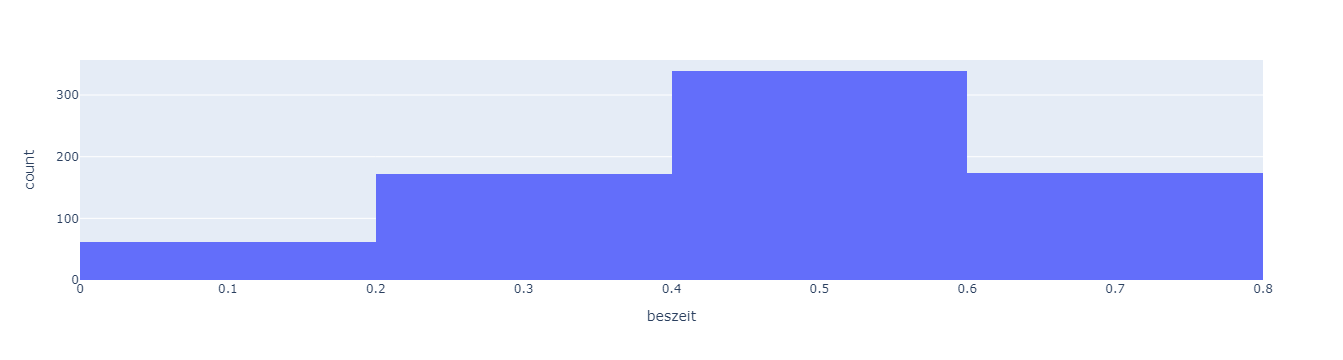

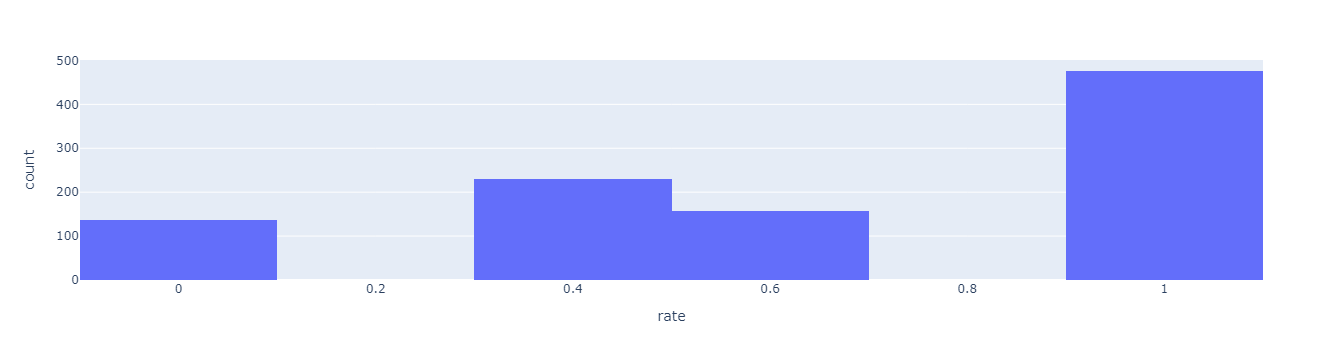

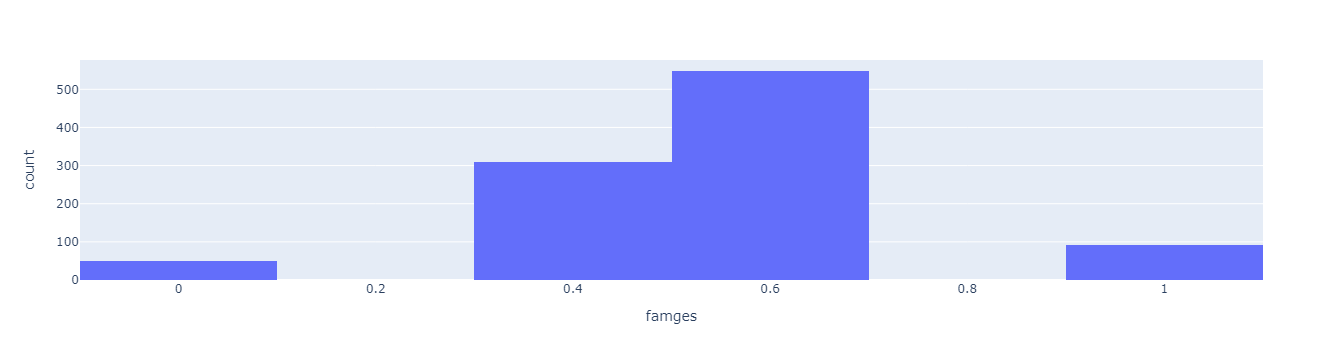

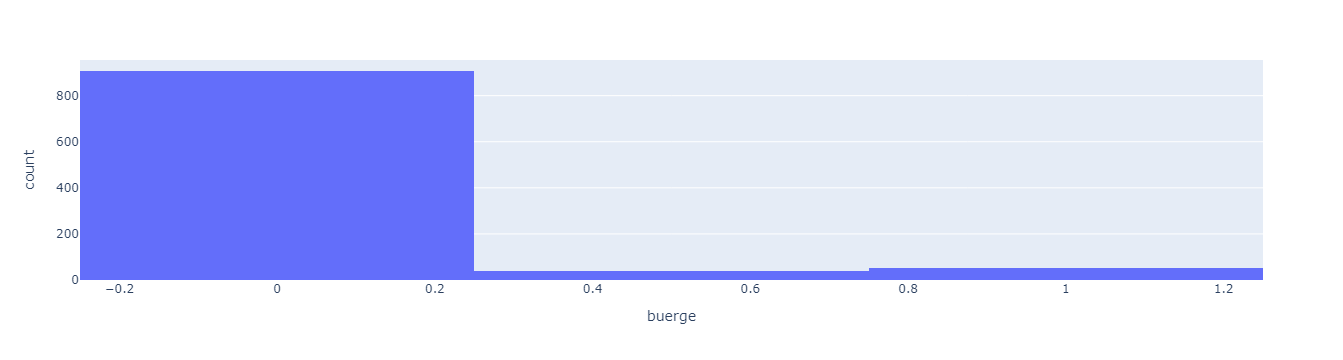

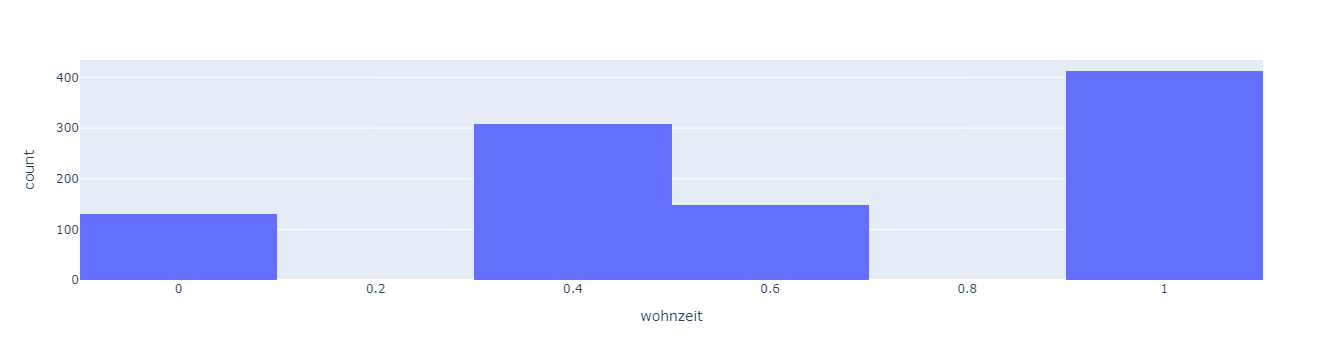

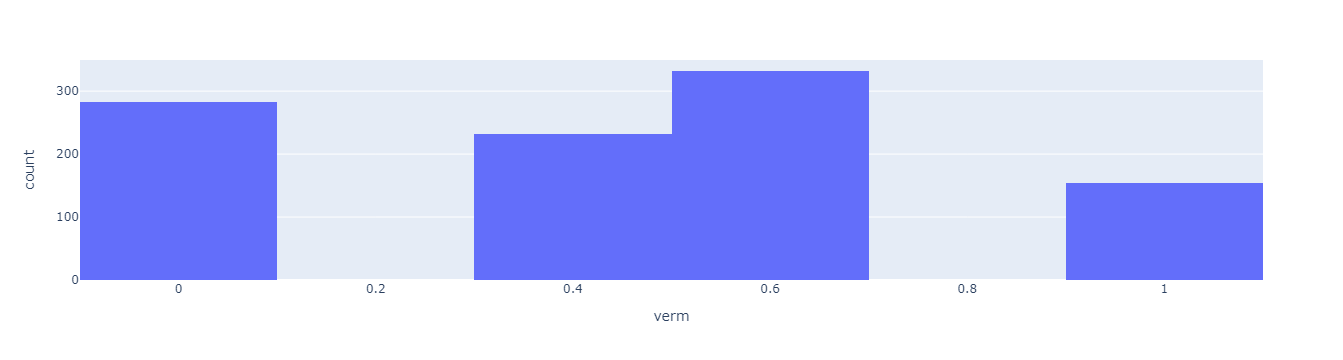

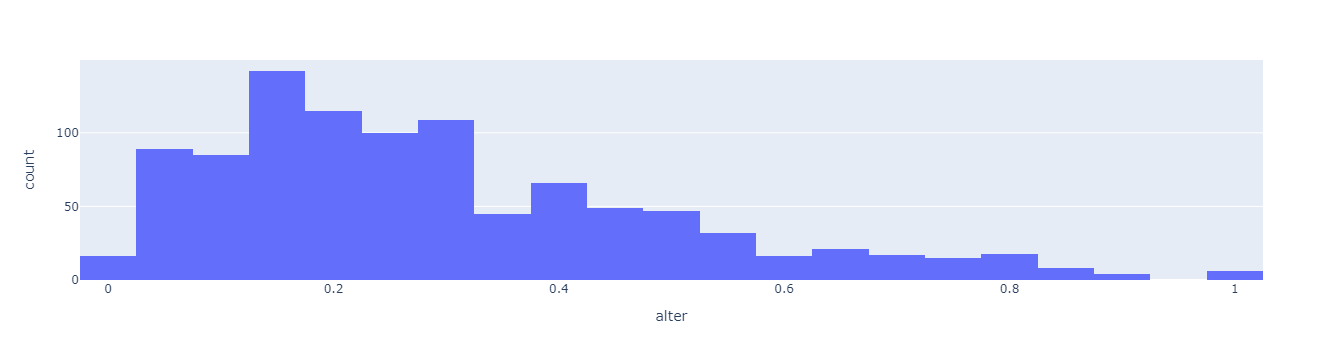

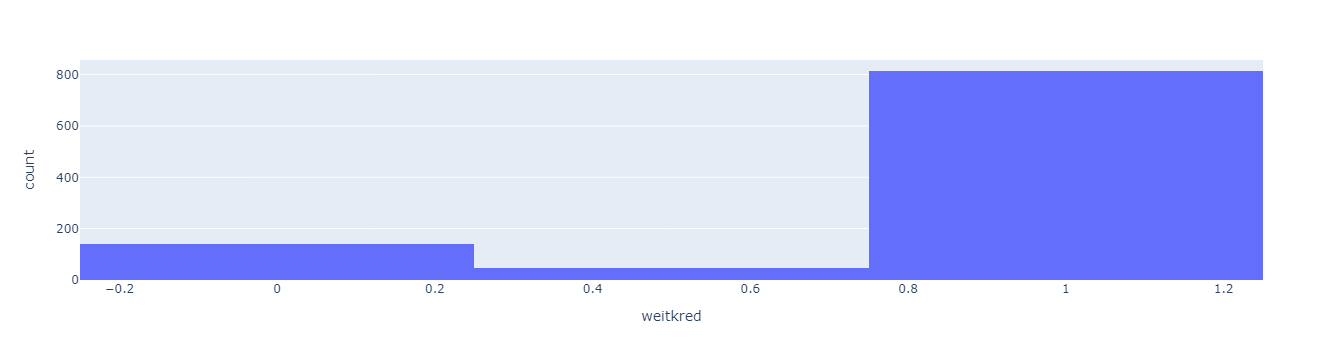

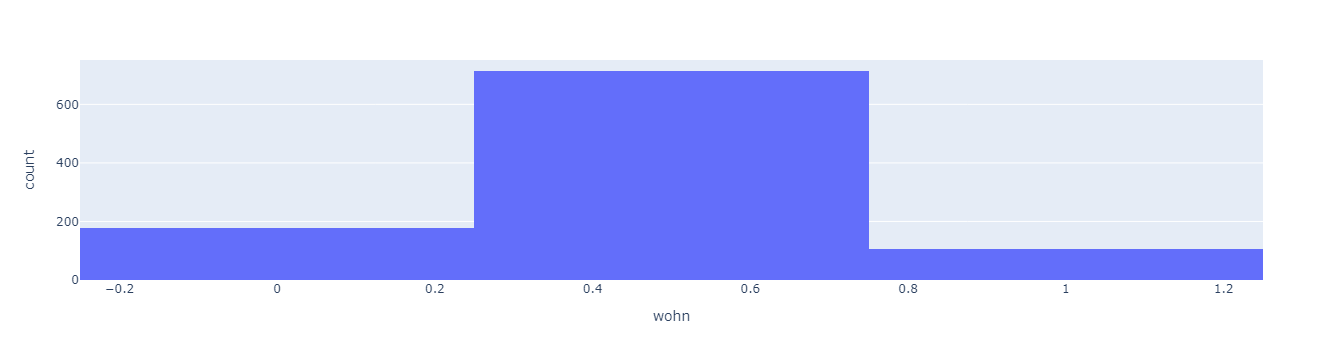

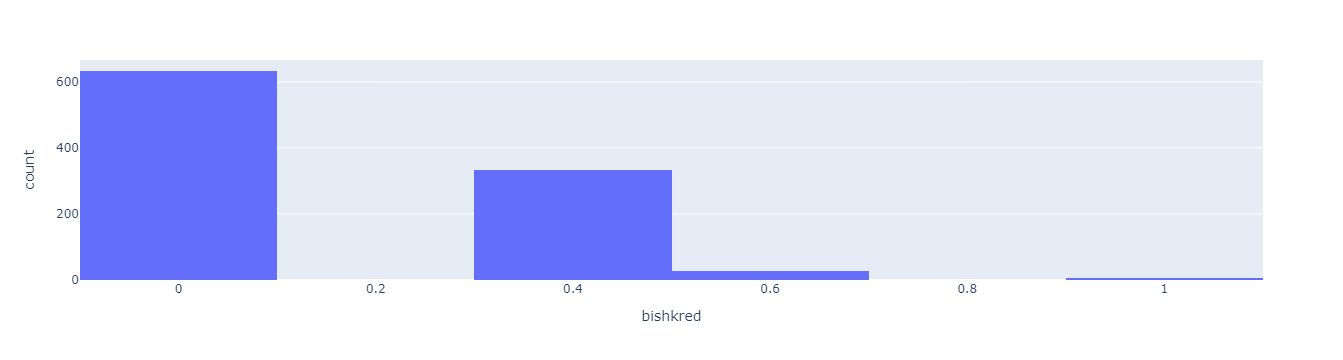

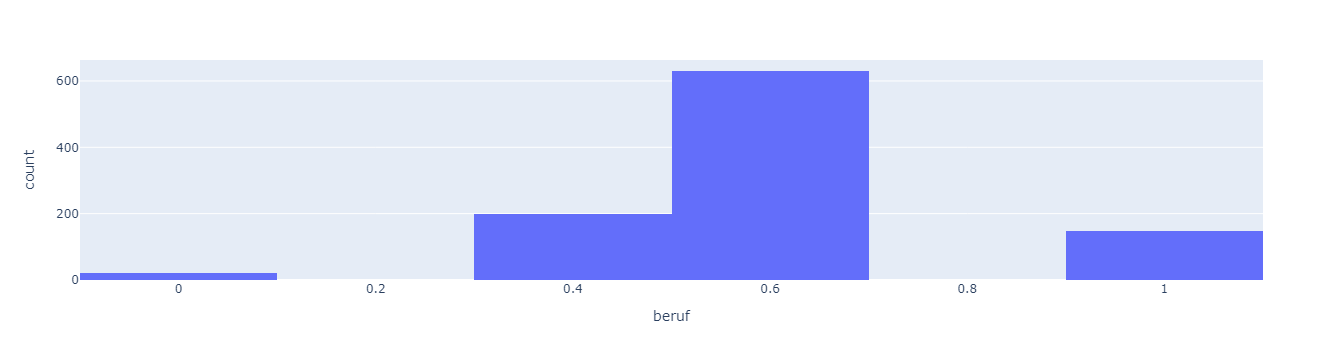

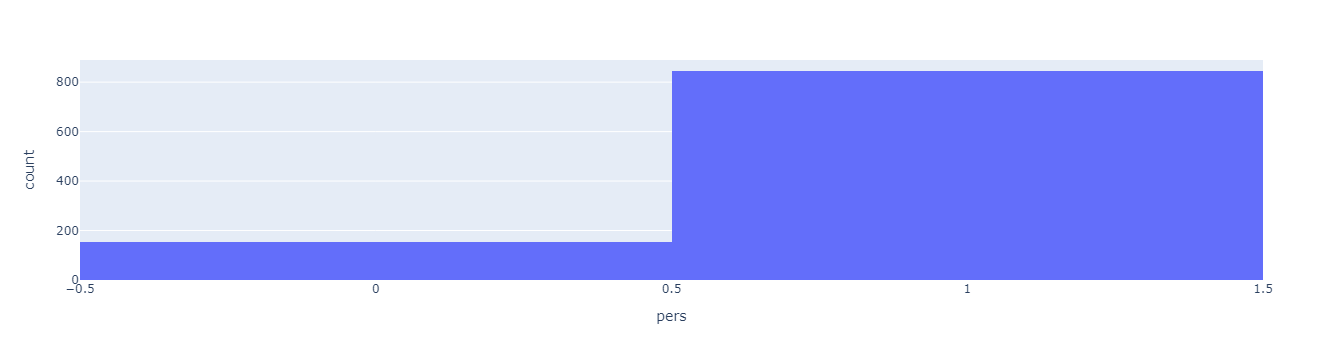

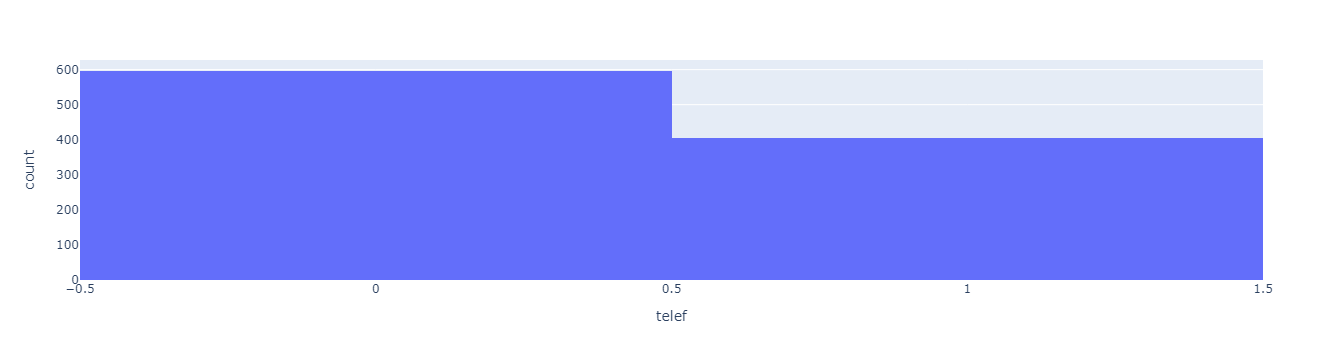

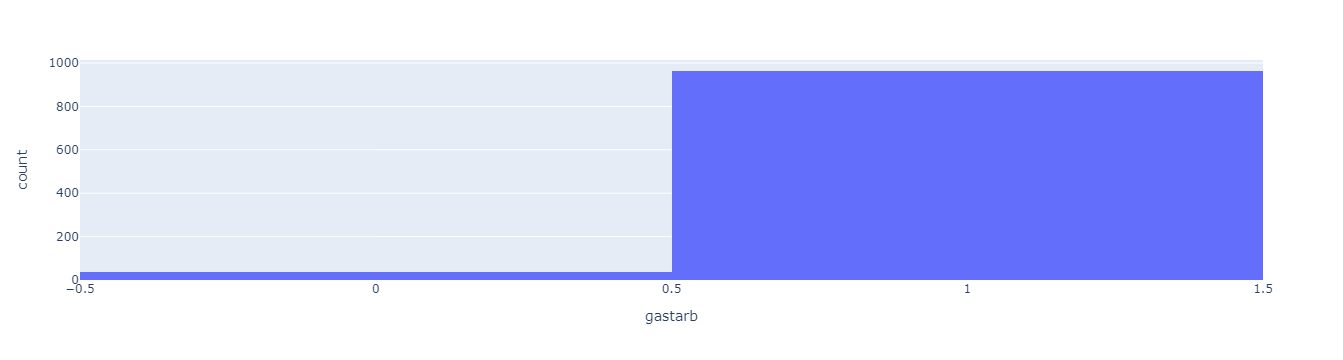

In [14]:
for f in features:
    show_histogram(minmax_scale_df, f)

### 3.2.3 Results 

Next, we will again work with minmax_scale_df as with the main dataset, so we will copy it to df


In [15]:
df = minmax_scale_df.copy()

We are fine with minmax scaling for all features, but we will try to apply std scale only for some of them after std scale


In [16]:
std_scale_features = ["laufzeit", "hoehe", "alter"]
df[std_scale_features] = std_scale(df[std_scale_features], std_scale_features)

Mean after standardization: laufzeit = 1.1368683772161603e-16
Standard deviation after standardization: laufzeit = 1.0

Mean after standardization: hoehe = 8.526512829121202e-17
Standard deviation after standardization: hoehe = 1.0

Mean after standardization: alter = -1.4210854715202004e-16
Standard deviation after standardization: alter = 0.9999999999999999



Let's take a look at the distribution of scaled features:


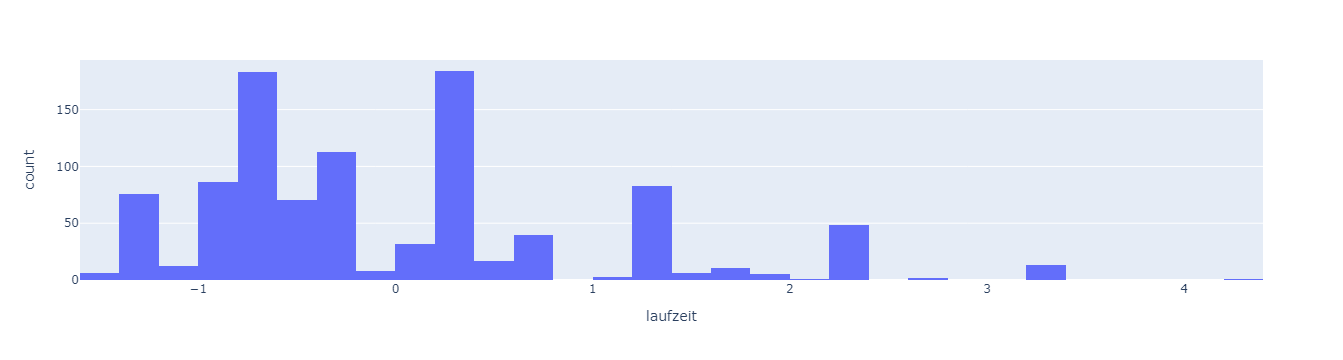

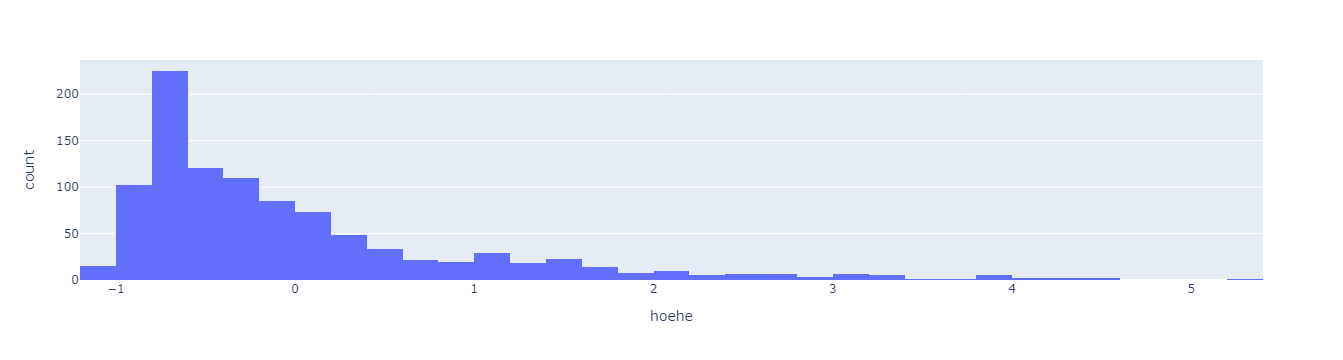

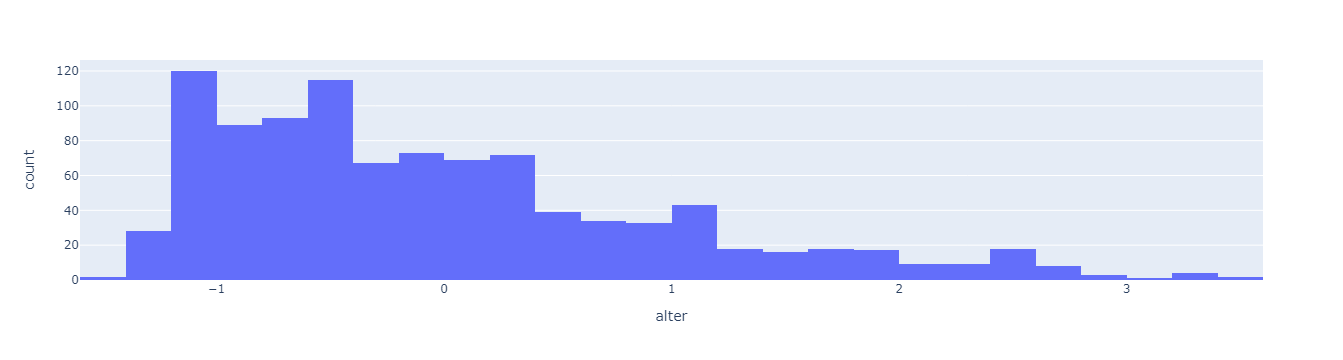

In [17]:
for f in std_scale_features:
    show_histogram(df, f)

Thus, all features were scaled using mixmax scale. Additionally, std scale was applied for three features


# 4. Feature engineering

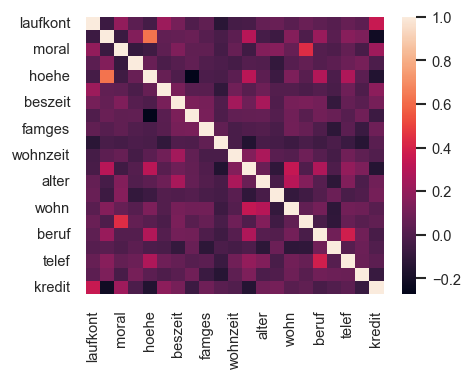

In [18]:
show_heatmap_corr(std_scale_df, 'images/std_scale_df_corr.png')

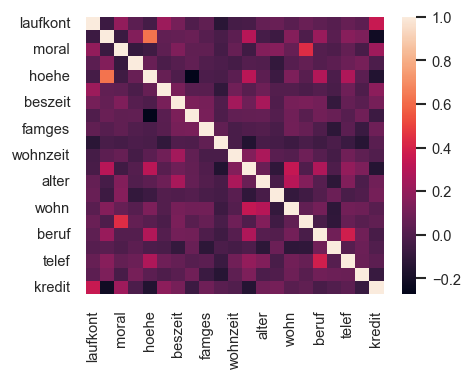

In [19]:
show_heatmap_corr(minmax_scale_df, 'images/minmax_scale_df_corr.png')

If we look at these two correlation matrices for std and mixmax scale, we can see that they are identical


Now look at the correlation matrix df after scaling


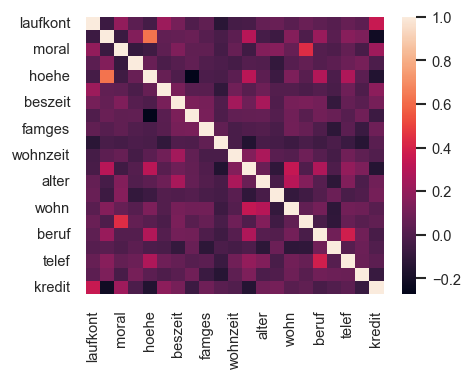

In [20]:
show_heatmap_corr(df, 'images/df_after_corr.png')

It is identical to the previous two


Strong dependencies are not visible on the map, at this stage there is no need to create new features


# 5. Dividing the dataset into training and test parts


In [21]:
X, y = get_features_target_split(df, target_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 6. Dimensionality reduction


## 6.1 Plotting Information Loss with Dimension Reduction


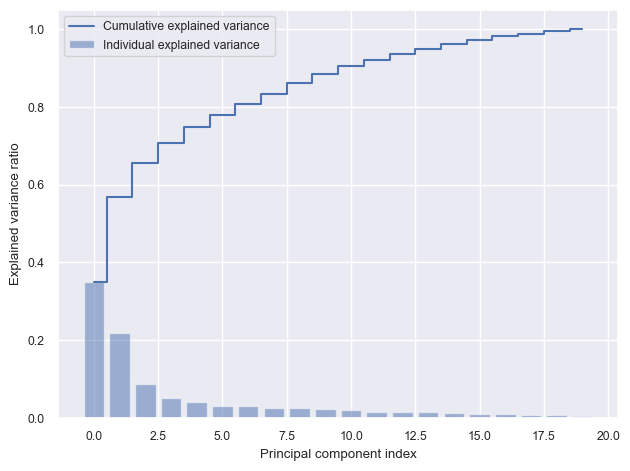

PCA.explained_variance_                [1.67174302 1.04512701 0.41293018 0.24021508 0.1981578  0.14825204
 0.13964255 0.12587574 0.12578241 0.10807549 0.09884918 0.07715024
 0.07222095 0.06767446 0.05543618 0.04993408 0.04577841 0.03350709
 0.03152152 0.02359501]
PCA.explained_variance_ratio_          [0.35036238 0.21903676 0.08654153 0.05034406 0.04152973 0.03107053
 0.02926616 0.02638092 0.02636136 0.02265036 0.02071672 0.01616908
 0.015136   0.01418315 0.01161826 0.01046514 0.0095942  0.00702239
 0.00660625 0.00494502]
PCA.explained_variance_ratio_.cumsum() [0.35036238 0.56939914 0.65594067 0.70628473 0.74781446 0.77888499
 0.80815114 0.83453207 0.86089343 0.88354379 0.90426051 0.92042959
 0.93556559 0.94974874 0.96136701 0.97183215 0.98142634 0.98844873
 0.99505498 1.        ]


In [22]:
PCA_variance = PCA(n_components=20).fit(X)
show_explained_variance_ratio_plot(PCA_variance)

The larger the PCA.explained_variance_ratio_ variance number, the more information is retained after applying PCA, and the less data we lose from the original


On the graph, we see that with the loss of 30% of information, the number of features will be 4.


## 6.2 Dimension reduction of dataset X


We found out that for the X dataset, with the loss of 30% of information, the number of features will be 4. Therefore, we set the PCA.n_components parameter to 4.


In [23]:
reduced_data_X_info30 = PCA(n_components=4).fit_transform(X)

## 6.3 Reducing the dimension of the X_train dataset


In [24]:
reduced_data_X_train_info30 = PCA(n_components=4).fit_transform(X_train)

## 6.4 Reducing the dimension of the X_test dataset


Let's reduce the dimension for X_test for predict


In [25]:
reduced_data_X_test_info30 = PCA(n_components=4).fit_transform(X_test)

# 7. Clustering

## 7.1 KMeans

### 7.1 Metrics 

#### 7.1.1 Elbow Curve Method


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

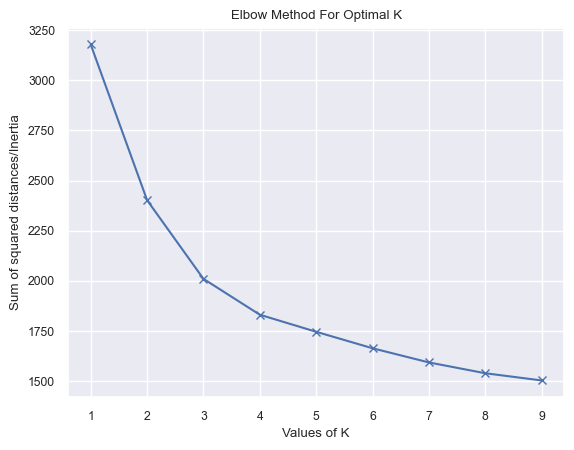

In [26]:
kmeans_metric_plot(X_train, range(1,10), 'squared_distances_sum')

We can see that in the above plot, the kink is at k = 3 (i.e., the sum of the squared distances drops suddenly), indicating that the optimal k value for this dataset is 3.


#### 7.1.2 silhouette_score

The silhouette coefficient s for one sample is defined as:  
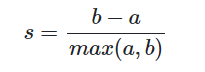   

a: average distance between the sample and all other points of the same class.  

b: average distance between the sample and all other points in the next nearest cluster.

The silhouette coefficient or kmeans silhouette score is a measure of how similar a data point is within a cluster (cohesion) compared to other clusters (separation).


Things to remember when calculating the silhouette factor:
- The silhouette coefficient value is between [-1, 1].  
- A score of 1 means best, which means that data point i is very compact in the cluster it belongs to and is far from other clusters.  - The worst value is -1. Values ​​near 0 indicate overlapping clusters.  



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

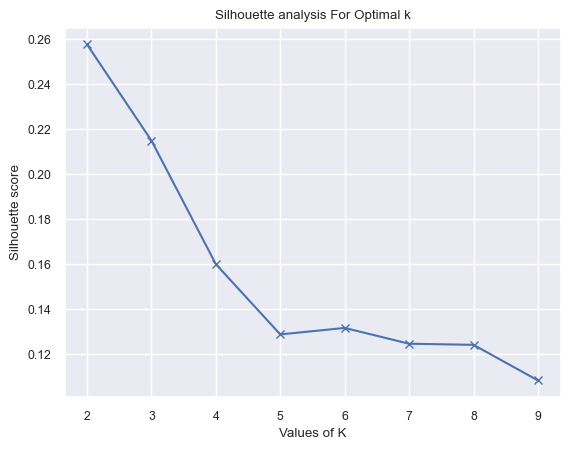

In [27]:
kmeans_metric_plot(X_train, range(2,10), 'silhouette_score')

We see that the silhouette score is maximum at k = 2


### 7.2 No loss of information


After analyzing the Elbow Curve Method metric, we found that the optimal value of k for data set X is 3. Therefore, we set the n_clusters parameter to 3.


In [28]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [29]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2,
       1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0,
       1, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1,
       1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2,

In [30]:
kmeans_predict = kmeans.predict(X_test)
kmeans_predict

array([1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1,
       0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1,
       0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [31]:
kmeans.cluster_centers_

array([[ 0.56666667, -0.36807542,  0.68      ,  0.266     , -0.33587397,
         0.325     ,  0.68666667,  0.70666667,  0.55111111,  0.08      ,
         0.76444444,  0.42444444,  1.38638794,  0.82666667,  0.54333333,
         0.17777778,  0.61111111,  0.78666667,  0.49333333,  0.97333333],
       [ 0.48809524,  1.44636417,  0.64107143,  0.34      ,  1.51241779,
         0.30357143,  0.5875    ,  0.59047619,  0.57619048,  0.05      ,
         0.61666667,  0.62142857, -0.10882682,  0.81785714,  0.53214286,
         0.15      ,  0.7452381 ,  0.84285714,  0.60714286,  0.98571429],
       [ 0.52017544, -0.33343248,  0.60921053,  0.27210526, -0.38249857,
         0.22697368,  0.56447368,  0.67192982,  0.55964912,  0.06973684,
         0.56052632,  0.42105263, -0.52203956,  0.84736842,  0.425     ,
         0.11666667,  0.62280702,  0.88684211,  0.33947368,  0.96052632]])

### 7.3 With the loss of 30% of information


In [32]:
kmeans_info30 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(reduced_data_X_train_info30)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [33]:
kmeans_labels_info30 = kmeans_info30.labels_
kmeans_labels_info30

array([0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1,
       2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2,
       1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1,

In [34]:
kmeans_predict_info30 = kmeans_info30.predict(reduced_data_X_test_info30)
kmeans_predict_info30

array([2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2,
       0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2,
       0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,

In [35]:
kmeans_info30.cluster_centers_

array([[-0.50385112,  1.36348489, -0.04813239,  0.01863727],
       [-0.55202835, -0.53554167,  0.00786031, -0.0268779 ],
       [ 2.11119824, -0.11739684,  0.03459879,  0.0523227 ]])

### 7.4 Score (silhouette_score)


If ground truth labels are unknown, estimation must be done using the model itself. The silhouette score (sklearn.metrics.silhouette_score) is an example of such a score, where a higher silhouette score refers to a model with more well-defined clusters.


#### 7.4.1 No loss of information, n_clusters=3


In [36]:
metrics.silhouette_score(X_train, kmeans_labels, metric='euclidean')

0.21518382840887193

#### 7.4.2 With the loss of 30% of information, n_clusters=3


In [37]:
metrics.silhouette_score(X_train, kmeans_labels_info30, metric='euclidean')

0.21172970118729012

#### 7.4.3 Results 

As you can see, the silhouette_score is practically the same without loss of information and with a loss of 30% of information


## 7.2 hdbscan

### 7.2.1 No loss of information


In [38]:
clusterer = hdbscan.HDBSCAN()

In [39]:
clusterer.fit(X)

HDBSCAN()

We get clusters:


In [40]:
clusterer.labels_

array([ 1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1, -1, -1,  0,
        1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  0,  1, -1,  1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1

Samples that are in the same cluster receive the same number. Cluster labels start at 0 and go up. So we can determine the number of clusters found by finding the largest cluster label.


In [41]:
clusterer.labels_.max()

1

The hdbscan library implements soft clustering, where each data point is assigned a cluster membership score ranging from 0.0 to 1.0. A score of 0.0 represents a sample that is not in the cluster at all (all noise points will receive this score), while a score of 1.0 represents a sample that is in the center of the cluster (note that this is not the concept of a spatial centroid). nuclei). You can access these scores through the probabilities_ attribute


In [42]:
clusterer.probabilities_

array([1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.95627101, 0.        , 0.94214282, 0.        , 0.        ,
       0.        , 0.94926554, 0.99313541, 0.92217963, 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.92950548, 0.97094286, 0.        ,
       0.95470121, 0.96575163, 0.94333392, 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.92222362,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.9529069 , 1.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.93461048, 0.97907815, 0.        ,
       1.        , 0.98679264, 0.        , 0.        , 0.93997142,
       1.        , 0.        , 1.        , 0.97249637, 0.        ,
       1.        , 0.        , 0.93455479, 0.93683517, 0.     

### 7.2.3 manhattan metric

In [43]:
clusterer_manh = hdbscan.HDBSCAN(metric='manhattan')
clusterer_manh.fit(X)
clusterer_manh.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

Available Metrics


In [44]:
hdbscan.dist_metrics.METRIC_MAPPING

{'euclidean': hdbscan.dist_metrics.EuclideanDistance,
 'l2': hdbscan.dist_metrics.EuclideanDistance,
 'minkowski': hdbscan.dist_metrics.MinkowskiDistance,
 'p': hdbscan.dist_metrics.MinkowskiDistance,
 'manhattan': hdbscan.dist_metrics.ManhattanDistance,
 'cityblock': hdbscan.dist_metrics.ManhattanDistance,
 'l1': hdbscan.dist_metrics.ManhattanDistance,
 'chebyshev': hdbscan.dist_metrics.ChebyshevDistance,
 'infinity': hdbscan.dist_metrics.ChebyshevDistance,
 'seuclidean': hdbscan.dist_metrics.SEuclideanDistance,
 'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance,
 'wminkowski': hdbscan.dist_metrics.WMinkowskiDistance,
 'hamming': hdbscan.dist_metrics.HammingDistance,
 'canberra': hdbscan.dist_metrics.CanberraDistance,
 'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance,
 'matching': hdbscan.dist_metrics.MatchingDistance,
 'jaccard': hdbscan.dist_metrics.JaccardDistance,
 'dice': hdbscan.dist_metrics.DiceDistance,
 'kulsinski': hdbscan.dist_metrics.KulsinskiDistance,
 'rogerst

### 7.2.4 precomputed metric

What if you don't have a nice set of points in the vector space, but only a pairwise distance matrix providing the distance between each pair of points? This is a common situation. Perhaps you have a complex custom distance measure; maybe you have strings and use levenshtein distance, etc. Again, that's okay because hdbscan supports a special metric called precomputed. If you create a clusterer with a metric set to precomputed, then the clusterer will assume that instead of passing in a vector of points in vector space, it receives a distance matrix for all pairs. Missing distances can be specified using numpy.inf, which causes HDBSCAN to ignore these pairwise relationships as long as there is a path between two points that contains certain distances (i.e. if too many distances are missing, clustering will fail).


In [45]:
distance_matrix = pairwise_distances(X)
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
clusterer.labels_

array([ 0,  1,  0, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0, -1, -1, -1,  1,
        0,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1,  0,  0,  0,  0, -1, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1,  1,  0, -1,  0,
        0, -1,  0, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0, -1,
       -1,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1, -1, -1, -1, -1,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0, -1, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,
       -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,  0,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,
        0,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,
       -1, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1

## 7.3 AgglomerativeClustering

In [46]:
clustering_aggl = AgglomerativeClustering().fit(X)

In [47]:
clustering_aggl

AgglomerativeClustering()

In [48]:
clustering_aggl.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# 8. Metrics 

## 7.2 pair_confusion_matrix

Pair confusion matrix resulting from two clusterings:


In [49]:
pair_confusion_matrix(y_test, kmeans_predict)

array([[26414, 19058],
       [35084, 28014]], dtype=int64)

Perfectly matching labels have all non-zero diagonal entries regardless of the actual label values


# 9. Plotting

## 9.1 Visualizing K-Means Clustering Results on Data Reduced with PCA (KMeans, PCA)


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



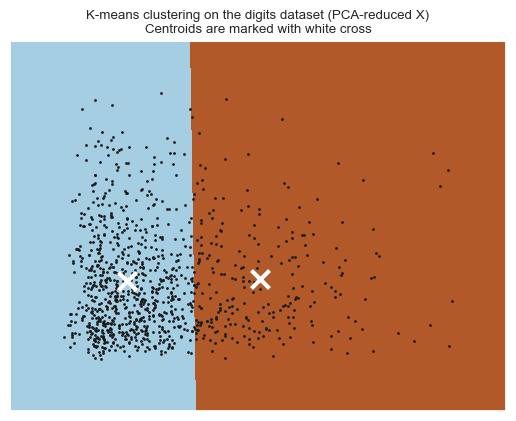

In [50]:
reduced_data_kmeans = PCA(n_components=2).fit_transform(X)
show_KMeans_plot(reduced_data_kmeans, 2)

## 9.2 HDBSCAN

We can group the data as usual and visualize the labels in different colors (and even cluster membership strengths as saturation levels).


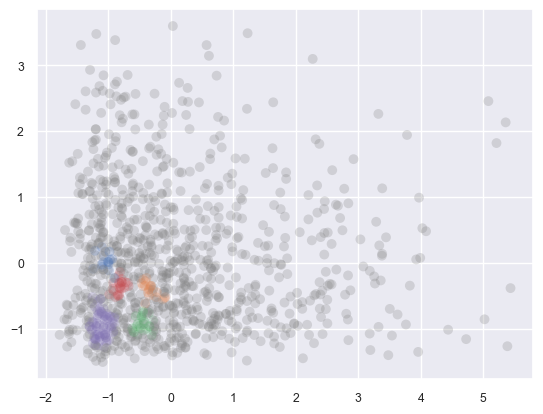

In [51]:
show_HDBSCAN_plot(X)

Now the question is what does the hierarchy of clusters look like - which clusters are located next to each other, or perhaps can be combined, and which ones are far from each other. We can access the underlying hierarchy through the condensed_tree_ attribute of the clusterer object


In [52]:
PCA_hdbscan = PCA(n_components=2).fit(X)
reduced_data_hdbscan = PCA_hdbscan.transform(X)
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size=15).fit(reduced_data_hdbscan)
clusterer_hdbscan.condensed_tree_

This simply gives us a CondensedTree object. If we want to visualize the hierarchy, we can call the plot() method:


<Axes: ylabel='$\\lambda$ value'>

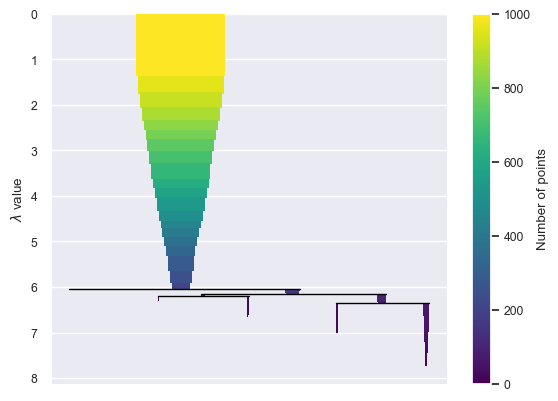

In [53]:
clusterer_hdbscan.condensed_tree_.plot()

We can now see the hierarchy as a dendrogram, with the width (and color) of each branch representing the number of points in the cluster at that level. If we want to know which branches were selected by the HDBSCAN* algorithm, we can pass select_clusters=True. You can even pass in a selection palette to colorize the selections according to the cluster label.


<Axes: ylabel='$\\lambda$ value'>

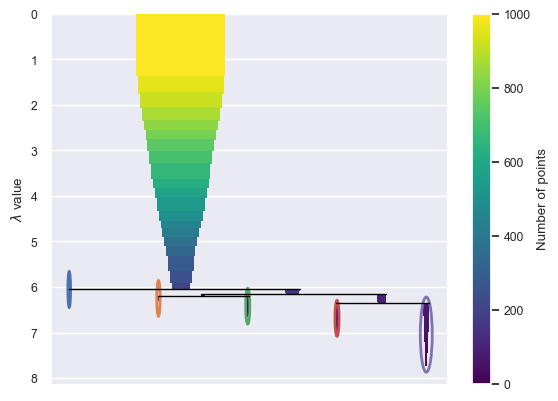

In [54]:
clusterer_hdbscan.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

## 9.3 AgglomerativeClustering

This example builds the corresponding hierarchical clustering dendrogram using AgglomerativeClustering and the dendrogram method available in scipy


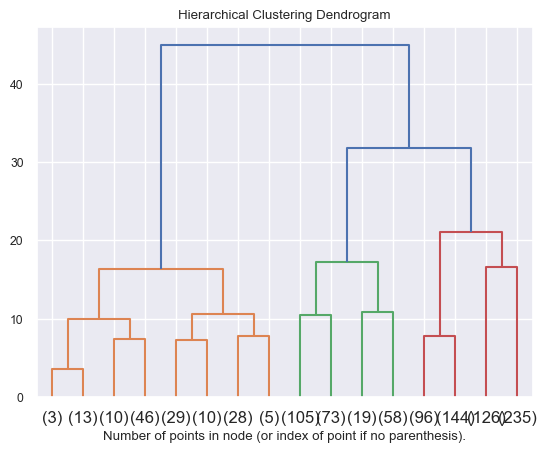

In [55]:
model_aggl = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model_aggl = model_aggl.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model_aggl, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()